In [1]:
import os

import torch

from MResNet import *
from MResNetC import *
from train import *

import seaborn as sns

sns.set()


"""
Code For 
Yiping Lu, Aoxiao Zhong, Quanzheng Li, Bin Dong. "Beyond Finite Layer Neural Network:Bridging Deep Architects and Numerical Differential Equations" 
Thirty-fifth International Conference on Machine Learning (ICML), 2018

@2prime @Aoxiao Zhong

Acknowledgement:
@pppppass(Zhihan Li)
"""
# %load_ext autoreload
# %autoreload 2
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"

/home/nox/repos/beyond/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'\nCode For \nYiping Lu, Aoxiao Zhong, Quanzheng Li, Bin Dong. "Beyond Finite Layer Neural Network:Bridging Deep Architects and Numerical Differential Equations" \nThirty-fifth International Conference on Machine Learning (ICML), 2018\n\n@2prime @Aoxiao Zhong\n\nAcknowledgement:\n@pppppass(Zhihan Li)\n'

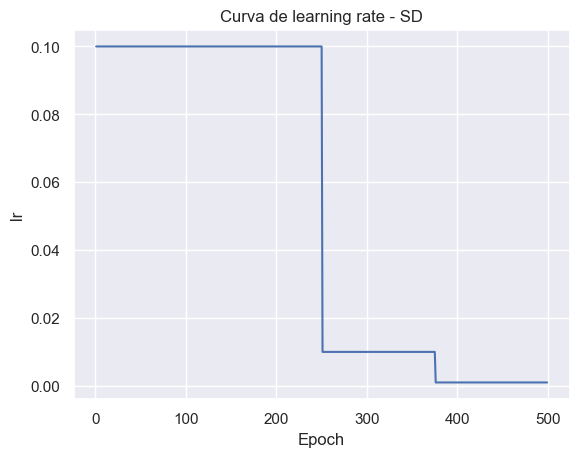

In [2]:
xs = [*range(1,500)]
ys = [lr_control({250: 0.1, 375: 0.01, 500: 0.001},x) for x in xs]

plt.figure()
plt.plot(xs, ys)
plt.title("Curva de learning rate - SD")
plt.ylabel("lr")
plt.xlabel("Epoch")
plt.show()

# Experiments

## LMResNet-110

In [3]:
batch_size = 128
trainloader, testloader = get_cifar10(batch_size)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
from torchinfo import summary
from blocks import BasicBlock, Bottleneck, BasicBlockWithDeathRate
from MResNet import MResNet

In [5]:
net = MResNet(BasicBlockWithDeathRate, [18,18,18], num_classes=10, stochastic_depth=True, PL=0.5, pretrain=False)
net.cuda()
model_name = "MResNet110-SD"

from pathlib import Path

p = Path(f"{model_name}.txt")
if p.exists():
    p.unlink()

summary(
    net,
    input_size=(batch_size, 3, 32, 32),
    depth=5,
    col_names=[
        "input_size",
        "output_size",
        "num_params",
        "kernel_size",
        "mult_adds",
    ],
)

[0.0, 0.009433962264150943, 0.018867924528301886, 0.02830188679245283, 0.03773584905660377, 0.04716981132075472, 0.05660377358490566, 0.0660377358490566, 0.07547169811320754, 0.08490566037735849, 0.09433962264150944, 0.10377358490566038, 0.11320754716981132, 0.12264150943396226, 0.1320754716981132, 0.14150943396226415, 0.1509433962264151, 0.16037735849056603, 0.16981132075471697, 0.1792452830188679, 0.18867924528301888, 0.19811320754716982, 0.20754716981132076, 0.2169811320754717, 0.22641509433962265, 0.2358490566037736, 0.24528301886792453, 0.25471698113207547, 0.2641509433962264, 0.27358490566037735, 0.2830188679245283, 0.29245283018867924, 0.3018867924528302, 0.3113207547169811, 0.32075471698113206, 0.330188679245283, 0.33962264150943394, 0.3490566037735849, 0.3584905660377358, 0.36792452830188677, 0.37735849056603776, 0.3867924528301887, 0.39622641509433965, 0.4056603773584906, 0.41509433962264153, 0.42452830188679247, 0.4339622641509434, 0.44339622641509435, 0.4528301886792453, 0.

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Kernel Shape              Mult-Adds
MResNet                                  [128, 3, 32, 32]          [128, 10]                 1,142                     --                        --
├─Conv2d: 1-1                            [128, 3, 32, 32]          [128, 16, 32, 32]         432                       [3, 3]                    56,623,104
├─ModuleList: 1-6                        --                        --                        (recursive)               --                        --
│    └─BasicBlockWithDeathRate: 2-1      [128, 16, 32, 32]         [128, 16, 32, 32]         --                        --                        --
│    │    └─BatchNorm2d: 3-1             [128, 16, 32, 32]         [128, 16, 32, 32]         32                        --                        4,096
│    │    └─ReLU: 3-2                    [128, 16, 32, 32]         [128, 16, 32, 32]         -

In [6]:
%%time
sgd_para = {"lr": 0.1, "weight_decay": 0.0001, "momentum": 0.9}
lr_dict = {250: 0.1, 375: 0.01, 500: 0.001}

# Trainer = NN_SGDTrainer(net,sgd_para, trainloader, testloader, {200:1e-3}, model_name + '.txt')
Trainer = NN_SGDTrainer(
    net,
    sgd_para,
    trainloader,
    testloader,
    lr_dict,
    model_name + ".txt",
)

for i in range(500):  # 100
    Trainer.train()

391it [00:51,  7.66it/s]

Epoch 1 finished, average loss: 0.0140781975
Starting testing


Correct: 4376, total: 10000, accuracy: 0.4375999868, average loss: 0.0118744613


391it [00:54,  7.23it/s]

Epoch 2 finished, average loss: 0.0109135315
Starting testing


Correct: 4824, total: 10000, accuracy: 0.4824000001, average loss: 0.0117962975


391it [00:54,  7.22it/s]

Epoch 3 finished, average loss: 0.0089388818
Starting testing


Correct: 5321, total: 10000, accuracy: 0.5320999622, average loss: 0.0107422178


391it [00:55,  7.10it/s]

Epoch 4 finished, average loss: 0.0076709589
Starting testing


Correct: 6532, total: 10000, accuracy: 0.6531999707, average loss: 0.0079781994


391it [00:54,  7.23it/s]

Epoch 5 finished, average loss: 0.0068136879
Starting testing


Correct: 6272, total: 10000, accuracy: 0.6272000074, average loss: 0.0084149421


391it [00:53,  7.31it/s]

Epoch 6 finished, average loss: 0.0063404421
Starting testing


Correct: 7036, total: 10000, accuracy: 0.7035999894, average loss: 0.0066911240


391it [00:52,  7.44it/s]

Epoch 7 finished, average loss: 0.0058048898
Starting testing


Correct: 7412, total: 10000, accuracy: 0.7411999702, average loss: 0.0058933426


391it [00:51,  7.56it/s]

Epoch 8 finished, average loss: 0.0054029667
Starting testing


Correct: 7724, total: 10000, accuracy: 0.7723999619, average loss: 0.0051995255


391it [00:51,  7.54it/s]

Epoch 9 finished, average loss: 0.0050776621
Starting testing


Correct: 7817, total: 10000, accuracy: 0.7816999555, average loss: 0.0049582547


391it [00:51,  7.57it/s]

Epoch 10 finished, average loss: 0.0048560231
Starting testing


Correct: 7490, total: 10000, accuracy: 0.7489999533, average loss: 0.0057647044


391it [00:51,  7.64it/s]

Epoch 11 finished, average loss: 0.0045325472
Starting testing


Correct: 7816, total: 10000, accuracy: 0.7815999985, average loss: 0.0050558355


391it [00:51,  7.58it/s]

Epoch 12 finished, average loss: 0.0043747552
Starting testing


Correct: 7848, total: 10000, accuracy: 0.7847999930, average loss: 0.0050675888


391it [00:53,  7.32it/s]

Epoch 13 finished, average loss: 0.0041759654
Starting testing


Correct: 7726, total: 10000, accuracy: 0.7725999951, average loss: 0.0051984773


391it [00:52,  7.39it/s]

Epoch 14 finished, average loss: 0.0040246439
Starting testing


Correct: 8134, total: 10000, accuracy: 0.8133999705, average loss: 0.0044190367


391it [00:52,  7.42it/s]

Epoch 15 finished, average loss: 0.0039411504
Starting testing


Correct: 8031, total: 10000, accuracy: 0.8030999899, average loss: 0.0045319061


391it [00:51,  7.60it/s]

Epoch 16 finished, average loss: 0.0038086263
Starting testing


Correct: 8358, total: 10000, accuracy: 0.8357999921, average loss: 0.0037909053


391it [00:51,  7.53it/s]

Epoch 17 finished, average loss: 0.0036951425
Starting testing


Correct: 8325, total: 10000, accuracy: 0.8324999809, average loss: 0.0039303149


391it [00:51,  7.54it/s]

Epoch 18 finished, average loss: 0.0035606253
Starting testing


Correct: 8486, total: 10000, accuracy: 0.8485999703, average loss: 0.0035221202


391it [00:52,  7.42it/s]

Epoch 19 finished, average loss: 0.0034657202
Starting testing


Correct: 8277, total: 10000, accuracy: 0.8276999593, average loss: 0.0040085700


391it [00:54,  7.13it/s]

Epoch 20 finished, average loss: 0.0034407470
Starting testing


Correct: 8372, total: 10000, accuracy: 0.8371999860, average loss: 0.0037313653


391it [00:51,  7.53it/s]

Epoch 21 finished, average loss: 0.0033164631
Starting testing


Correct: 8275, total: 10000, accuracy: 0.8274999857, average loss: 0.0040938323


391it [00:52,  7.43it/s]

Epoch 22 finished, average loss: 0.0032482048
Starting testing


Correct: 8388, total: 10000, accuracy: 0.8387999535, average loss: 0.0039564174


391it [00:52,  7.39it/s]

Epoch 23 finished, average loss: 0.0032007539
Starting testing


Correct: 8436, total: 10000, accuracy: 0.8435999751, average loss: 0.0036143347


391it [00:53,  7.26it/s]

Epoch 24 finished, average loss: 0.0031067035
Starting testing


Correct: 8520, total: 10000, accuracy: 0.8519999981, average loss: 0.0034824001


391it [00:55,  7.09it/s]

Epoch 25 finished, average loss: 0.0030814975
Starting testing


Correct: 8471, total: 10000, accuracy: 0.8470999599, average loss: 0.0036122797


391it [00:55,  7.09it/s]

Epoch 26 finished, average loss: 0.0029656892
Starting testing


Correct: 8672, total: 10000, accuracy: 0.8671999574, average loss: 0.0031730666


391it [00:55,  7.08it/s]

Epoch 27 finished, average loss: 0.0029332818
Starting testing


Correct: 8597, total: 10000, accuracy: 0.8596999645, average loss: 0.0033983788


391it [00:54,  7.13it/s]

Epoch 28 finished, average loss: 0.0029396082
Starting testing


Correct: 8512, total: 10000, accuracy: 0.8511999846, average loss: 0.0034370154


391it [00:53,  7.26it/s]

Epoch 29 finished, average loss: 0.0028608433
Starting testing


Correct: 8651, total: 10000, accuracy: 0.8650999665, average loss: 0.0031512549


391it [00:53,  7.28it/s]

Epoch 30 finished, average loss: 0.0028004383
Starting testing


Correct: 8633, total: 10000, accuracy: 0.8632999659, average loss: 0.0032766902


391it [00:53,  7.35it/s]

Epoch 31 finished, average loss: 0.0028180067
Starting testing


Correct: 8727, total: 10000, accuracy: 0.8726999760, average loss: 0.0029485462


391it [00:52,  7.41it/s]

Epoch 32 finished, average loss: 0.0027013822
Starting testing


Correct: 8620, total: 10000, accuracy: 0.8619999886, average loss: 0.0032916601


391it [00:54,  7.17it/s]

Epoch 33 finished, average loss: 0.0027242307
Starting testing


Correct: 8582, total: 10000, accuracy: 0.8581999540, average loss: 0.0032893667


391it [00:54,  7.15it/s]

Epoch 34 finished, average loss: 0.0027044393
Starting testing


Correct: 8707, total: 10000, accuracy: 0.8707000017, average loss: 0.0030262404


391it [00:54,  7.19it/s]

Epoch 35 finished, average loss: 0.0026084772
Starting testing


Correct: 8543, total: 10000, accuracy: 0.8542999625, average loss: 0.0035304841


391it [00:54,  7.21it/s]

Epoch 36 finished, average loss: 0.0026243364
Starting testing


Correct: 8757, total: 10000, accuracy: 0.8756999969, average loss: 0.0029684440


391it [00:54,  7.14it/s]

Epoch 37 finished, average loss: 0.0025764313
Starting testing


Correct: 8777, total: 10000, accuracy: 0.8776999712, average loss: 0.0028593850


391it [00:55,  7.03it/s]

Epoch 38 finished, average loss: 0.0025266273
Starting testing


Correct: 8746, total: 10000, accuracy: 0.8745999932, average loss: 0.0029583250


391it [00:54,  7.12it/s]

Epoch 39 finished, average loss: 0.0025391899
Starting testing


Correct: 8521, total: 10000, accuracy: 0.8520999551, average loss: 0.0037507251


391it [00:53,  7.34it/s]

Epoch 40 finished, average loss: 0.0024293282
Starting testing


Correct: 8647, total: 10000, accuracy: 0.8646999598, average loss: 0.0033041222


391it [00:53,  7.30it/s]

Epoch 41 finished, average loss: 0.0024478782
Starting testing


Correct: 8494, total: 10000, accuracy: 0.8493999839, average loss: 0.0036132693


391it [00:52,  7.41it/s]

Epoch 42 finished, average loss: 0.0024080252
Starting testing


Correct: 8750, total: 10000, accuracy: 0.8750000000, average loss: 0.0030532627


391it [00:53,  7.36it/s]

Epoch 43 finished, average loss: 0.0024146516
Starting testing


Correct: 8653, total: 10000, accuracy: 0.8652999997, average loss: 0.0031887289


391it [00:53,  7.28it/s]

Epoch 44 finished, average loss: 0.0023876557
Starting testing


Correct: 8849, total: 10000, accuracy: 0.8848999739, average loss: 0.0026807025


391it [00:52,  7.43it/s]

Epoch 45 finished, average loss: 0.0023675967
Starting testing


Correct: 8711, total: 10000, accuracy: 0.8710999489, average loss: 0.0029883147


391it [00:52,  7.38it/s]

Epoch 46 finished, average loss: 0.0023847679
Starting testing


Correct: 8760, total: 10000, accuracy: 0.8759999871, average loss: 0.0029874330


391it [00:53,  7.32it/s]

Epoch 47 finished, average loss: 0.0022852694
Starting testing


Correct: 8635, total: 10000, accuracy: 0.8634999990, average loss: 0.0031942217


391it [00:53,  7.31it/s]

Epoch 48 finished, average loss: 0.0023084843
Starting testing


Correct: 8734, total: 10000, accuracy: 0.8733999729, average loss: 0.0029279015


391it [00:54,  7.20it/s]

Epoch 49 finished, average loss: 0.0023045639
Starting testing


Correct: 8823, total: 10000, accuracy: 0.8822999597, average loss: 0.0026766415


391it [00:53,  7.27it/s]

Epoch 50 finished, average loss: 0.0022894104
Starting testing


Correct: 8623, total: 10000, accuracy: 0.8622999787, average loss: 0.0032924986


391it [00:53,  7.27it/s]

Epoch 51 finished, average loss: 0.0022776410
Starting testing


Correct: 8800, total: 10000, accuracy: 0.8799999952, average loss: 0.0028398060


391it [00:53,  7.36it/s]

Epoch 52 finished, average loss: 0.0022063076
Starting testing


Correct: 8842, total: 10000, accuracy: 0.8841999769, average loss: 0.0029347026


391it [00:53,  7.27it/s]

Epoch 53 finished, average loss: 0.0022071205
Starting testing


Correct: 8742, total: 10000, accuracy: 0.8741999865, average loss: 0.0030236104


391it [00:53,  7.28it/s]

Epoch 54 finished, average loss: 0.0022085119
Starting testing


Correct: 8783, total: 10000, accuracy: 0.8782999516, average loss: 0.0032337640


391it [00:53,  7.26it/s]

Epoch 55 finished, average loss: 0.0022110245
Starting testing


Correct: 8810, total: 10000, accuracy: 0.8809999824, average loss: 0.0027682377


391it [00:55,  7.11it/s]

Epoch 56 finished, average loss: 0.0021798389
Starting testing


Correct: 8796, total: 10000, accuracy: 0.8795999885, average loss: 0.0029086099


391it [00:59,  6.62it/s]

Epoch 57 finished, average loss: 0.0021768606
Starting testing


Correct: 8773, total: 10000, accuracy: 0.8772999644, average loss: 0.0029989926


391it [00:59,  6.58it/s]

Epoch 58 finished, average loss: 0.0021461311
Starting testing


Correct: 8892, total: 10000, accuracy: 0.8891999722, average loss: 0.0025845426


391it [00:58,  6.71it/s]

Epoch 59 finished, average loss: 0.0021496083
Starting testing


Correct: 8621, total: 10000, accuracy: 0.8621000051, average loss: 0.0032589366


391it [00:58,  6.72it/s]

Epoch 60 finished, average loss: 0.0021355880
Starting testing


Correct: 8786, total: 10000, accuracy: 0.8786000013, average loss: 0.0028628121


391it [00:59,  6.57it/s]


Epoch 61 finished, average loss: 0.0020911386
Starting testing
Correct: 8761, total: 10000, accuracy: 0.8761000037, average loss: 0.0028922849


391it [00:59,  6.57it/s]

Epoch 62 finished, average loss: 0.0021143905
Starting testing


Correct: 8935, total: 10000, accuracy: 0.8934999704, average loss: 0.0024603941


391it [00:59,  6.58it/s]

Epoch 63 finished, average loss: 0.0020952773
Starting testing


Correct: 8906, total: 10000, accuracy: 0.8905999660, average loss: 0.0027079140


391it [01:01,  6.31it/s]

Epoch 64 finished, average loss: 0.0020805392
Starting testing


Correct: 8731, total: 10000, accuracy: 0.8730999827, average loss: 0.0031617646


391it [00:58,  6.66it/s]

Epoch 65 finished, average loss: 0.0020494682
Starting testing


Correct: 8823, total: 10000, accuracy: 0.8822999597, average loss: 0.0027942772


391it [00:58,  6.65it/s]

Epoch 66 finished, average loss: 0.0020319914
Starting testing


Correct: 8920, total: 10000, accuracy: 0.8919999599, average loss: 0.0024801487


391it [00:59,  6.60it/s]

Epoch 67 finished, average loss: 0.0020111502
Starting testing


Correct: 8818, total: 10000, accuracy: 0.8817999959, average loss: 0.0028144052


391it [00:58,  6.72it/s]

Epoch 68 finished, average loss: 0.0020536282
Starting testing


Correct: 8798, total: 10000, accuracy: 0.8797999620, average loss: 0.0029747858


391it [00:58,  6.72it/s]

Epoch 69 finished, average loss: 0.0019913775
Starting testing


Correct: 8705, total: 10000, accuracy: 0.8704999685, average loss: 0.0031658041


391it [00:57,  6.75it/s]

Epoch 70 finished, average loss: 0.0020163623
Starting testing


Correct: 8838, total: 10000, accuracy: 0.8837999701, average loss: 0.0027257848


391it [00:57,  6.78it/s]

Epoch 71 finished, average loss: 0.0019946030
Starting testing


Correct: 8829, total: 10000, accuracy: 0.8828999996, average loss: 0.0028800394


391it [00:58,  6.64it/s]

Epoch 72 finished, average loss: 0.0019947292
Starting testing


Correct: 8829, total: 10000, accuracy: 0.8828999996, average loss: 0.0028764986


391it [00:57,  6.74it/s]


Epoch 73 finished, average loss: 0.0019714131
Starting testing
Correct: 8979, total: 10000, accuracy: 0.8978999853, average loss: 0.0025274900


391it [00:57,  6.77it/s]

Epoch 74 finished, average loss: 0.0019478166
Starting testing


Correct: 8837, total: 10000, accuracy: 0.8836999536, average loss: 0.0028491808


391it [00:57,  6.77it/s]

Epoch 75 finished, average loss: 0.0019682275
Starting testing


Correct: 9018, total: 10000, accuracy: 0.9017999768, average loss: 0.0023874055


391it [00:58,  6.66it/s]

Epoch 76 finished, average loss: 0.0019426466
Starting testing


Correct: 8828, total: 10000, accuracy: 0.8827999830, average loss: 0.0029934462


391it [00:59,  6.57it/s]

Epoch 77 finished, average loss: 0.0019783813
Starting testing


Correct: 8746, total: 10000, accuracy: 0.8745999932, average loss: 0.0029418534


391it [00:58,  6.70it/s]

Epoch 78 finished, average loss: 0.0019283886
Starting testing


Correct: 8993, total: 10000, accuracy: 0.8992999792, average loss: 0.0024347874


391it [00:58,  6.73it/s]

Epoch 79 finished, average loss: 0.0019398824
Starting testing


Correct: 8976, total: 10000, accuracy: 0.8975999951, average loss: 0.0024299073


391it [00:58,  6.71it/s]

Epoch 80 finished, average loss: 0.0019356828
Starting testing


Correct: 8785, total: 10000, accuracy: 0.8784999847, average loss: 0.0028356408


391it [00:58,  6.72it/s]

Epoch 81 finished, average loss: 0.0019174486
Starting testing


Correct: 8924, total: 10000, accuracy: 0.8923999667, average loss: 0.0026121650


391it [00:58,  6.68it/s]

Epoch 82 finished, average loss: 0.0019051796
Starting testing


Correct: 8966, total: 10000, accuracy: 0.8965999484, average loss: 0.0024355839


391it [00:57,  6.75it/s]

Epoch 83 finished, average loss: 0.0018802542
Starting testing


Correct: 8849, total: 10000, accuracy: 0.8848999739, average loss: 0.0028614886


391it [00:58,  6.73it/s]

Epoch 84 finished, average loss: 0.0018889612
Starting testing


Correct: 8788, total: 10000, accuracy: 0.8787999749, average loss: 0.0031369691


391it [00:54,  7.13it/s]

Epoch 85 finished, average loss: 0.0018811549
Starting testing


Correct: 8804, total: 10000, accuracy: 0.8804000020, average loss: 0.0029877249


391it [00:54,  7.14it/s]

Epoch 86 finished, average loss: 0.0019143394
Starting testing


Correct: 8764, total: 10000, accuracy: 0.8763999939, average loss: 0.0029778369


391it [00:52,  7.49it/s]

Epoch 87 finished, average loss: 0.0018703544
Starting testing


Correct: 8865, total: 10000, accuracy: 0.8865000010, average loss: 0.0027251098


391it [00:52,  7.48it/s]

Epoch 88 finished, average loss: 0.0018693440
Starting testing


Correct: 8882, total: 10000, accuracy: 0.8881999850, average loss: 0.0026612048


391it [00:52,  7.51it/s]

Epoch 89 finished, average loss: 0.0018502967
Starting testing


Correct: 8722, total: 10000, accuracy: 0.8721999526, average loss: 0.0031973905


391it [00:53,  7.36it/s]

Epoch 90 finished, average loss: 0.0018632736
Starting testing


Correct: 8990, total: 10000, accuracy: 0.8989999890, average loss: 0.0023167997


391it [00:51,  7.53it/s]

Epoch 91 finished, average loss: 0.0018753963
Starting testing


Correct: 8666, total: 10000, accuracy: 0.8665999770, average loss: 0.0031493310


391it [00:53,  7.35it/s]

Epoch 92 finished, average loss: 0.0018757210
Starting testing


Correct: 8704, total: 10000, accuracy: 0.8703999519, average loss: 0.0032771027


391it [00:51,  7.54it/s]

Epoch 93 finished, average loss: 0.0017956650
Starting testing


Correct: 8777, total: 10000, accuracy: 0.8776999712, average loss: 0.0028911527


391it [00:51,  7.59it/s]

Epoch 94 finished, average loss: 0.0018134423
Starting testing


Correct: 9049, total: 10000, accuracy: 0.9048999548, average loss: 0.0021839788


391it [00:52,  7.51it/s]

Epoch 95 finished, average loss: 0.0017876174
Starting testing


Correct: 8957, total: 10000, accuracy: 0.8956999779, average loss: 0.0024663161


391it [00:51,  7.55it/s]

Epoch 96 finished, average loss: 0.0018090542
Starting testing


Correct: 8768, total: 10000, accuracy: 0.8768000007, average loss: 0.0030149552


391it [00:51,  7.52it/s]

Epoch 97 finished, average loss: 0.0017794864
Starting testing


Correct: 9023, total: 10000, accuracy: 0.9023000002, average loss: 0.0024771924


391it [00:52,  7.45it/s]

Epoch 98 finished, average loss: 0.0017790779
Starting testing


Correct: 8940, total: 10000, accuracy: 0.8939999938, average loss: 0.0024483573


391it [00:51,  7.53it/s]

Epoch 99 finished, average loss: 0.0018223132
Starting testing


Correct: 8838, total: 10000, accuracy: 0.8837999701, average loss: 0.0027609855


391it [00:51,  7.52it/s]

Epoch 100 finished, average loss: 0.0018079738
Starting testing


Correct: 8933, total: 10000, accuracy: 0.8932999969, average loss: 0.0025454232


391it [00:51,  7.53it/s]

Epoch 101 finished, average loss: 0.0018235320
Starting testing


Correct: 9031, total: 10000, accuracy: 0.9030999541, average loss: 0.0023275345


391it [00:51,  7.53it/s]

Epoch 102 finished, average loss: 0.0017826373
Starting testing


Correct: 8943, total: 10000, accuracy: 0.8942999840, average loss: 0.0025129462


391it [00:51,  7.55it/s]

Epoch 103 finished, average loss: 0.0017792334
Starting testing


Correct: 9010, total: 10000, accuracy: 0.9009999633, average loss: 0.0023176684


391it [00:52,  7.48it/s]

Epoch 104 finished, average loss: 0.0017211677
Starting testing


Correct: 8920, total: 10000, accuracy: 0.8919999599, average loss: 0.0026198076


391it [00:52,  7.50it/s]

Epoch 105 finished, average loss: 0.0017501342
Starting testing


Correct: 8894, total: 10000, accuracy: 0.8894000053, average loss: 0.0026950759


391it [00:52,  7.50it/s]

Epoch 106 finished, average loss: 0.0017768988
Starting testing


Correct: 8829, total: 10000, accuracy: 0.8828999996, average loss: 0.0027775163


391it [00:52,  7.46it/s]

Epoch 107 finished, average loss: 0.0017315056
Starting testing


Correct: 8962, total: 10000, accuracy: 0.8962000012, average loss: 0.0024307756


391it [00:52,  7.46it/s]

Epoch 108 finished, average loss: 0.0017698606
Starting testing


Correct: 9012, total: 10000, accuracy: 0.9011999965, average loss: 0.0025554395


391it [00:52,  7.48it/s]

Epoch 109 finished, average loss: 0.0017441662
Starting testing


Correct: 8916, total: 10000, accuracy: 0.8915999532, average loss: 0.0026486243


391it [00:52,  7.49it/s]

Epoch 110 finished, average loss: 0.0017567879
Starting testing


Correct: 8753, total: 10000, accuracy: 0.8752999902, average loss: 0.0031706616


391it [00:52,  7.50it/s]

Epoch 111 finished, average loss: 0.0017122644
Starting testing


Correct: 8640, total: 10000, accuracy: 0.8639999628, average loss: 0.0035587923


391it [00:52,  7.46it/s]

Epoch 112 finished, average loss: 0.0017332943
Starting testing


Correct: 8916, total: 10000, accuracy: 0.8915999532, average loss: 0.0026280020


391it [00:52,  7.50it/s]

Epoch 113 finished, average loss: 0.0017557557
Starting testing


Correct: 8822, total: 10000, accuracy: 0.8822000027, average loss: 0.0028785424


391it [00:52,  7.52it/s]

Epoch 114 finished, average loss: 0.0016572242
Starting testing


Correct: 8948, total: 10000, accuracy: 0.8947999477, average loss: 0.0025575407


391it [00:50,  7.79it/s]

Epoch 115 finished, average loss: 0.0017317888
Starting testing


Correct: 8984, total: 10000, accuracy: 0.8983999491, average loss: 0.0024163290


391it [00:49,  7.83it/s]

Epoch 116 finished, average loss: 0.0017668012
Starting testing


Correct: 8662, total: 10000, accuracy: 0.8661999702, average loss: 0.0034169946


391it [00:49,  7.85it/s]

Epoch 117 finished, average loss: 0.0017251910
Starting testing


Correct: 8935, total: 10000, accuracy: 0.8934999704, average loss: 0.0026488755


391it [00:49,  7.84it/s]

Epoch 118 finished, average loss: 0.0017079522
Starting testing


Correct: 8986, total: 10000, accuracy: 0.8985999823, average loss: 0.0023660385


391it [00:49,  7.84it/s]

Epoch 119 finished, average loss: 0.0017104547
Starting testing


Correct: 8936, total: 10000, accuracy: 0.8935999870, average loss: 0.0025855846


391it [00:50,  7.79it/s]

Epoch 120 finished, average loss: 0.0017704289
Starting testing


Correct: 9012, total: 10000, accuracy: 0.9011999965, average loss: 0.0023327805


391it [00:49,  7.83it/s]

Epoch 121 finished, average loss: 0.0017080083
Starting testing


Correct: 8982, total: 10000, accuracy: 0.8981999755, average loss: 0.0024750120


391it [00:49,  7.83it/s]

Epoch 122 finished, average loss: 0.0017009854
Starting testing


Correct: 9057, total: 10000, accuracy: 0.9056999683, average loss: 0.0022462057


391it [00:50,  7.81it/s]

Epoch 123 finished, average loss: 0.0017246024
Starting testing


Correct: 8946, total: 10000, accuracy: 0.8945999742, average loss: 0.0025111710


391it [00:49,  7.85it/s]

Epoch 124 finished, average loss: 0.0017176773
Starting testing


Correct: 8962, total: 10000, accuracy: 0.8962000012, average loss: 0.0027154187


391it [00:49,  7.86it/s]

Epoch 125 finished, average loss: 0.0016741324
Starting testing


Correct: 8920, total: 10000, accuracy: 0.8919999599, average loss: 0.0025768520


391it [00:50,  7.82it/s]

Epoch 126 finished, average loss: 0.0017175810
Starting testing


Correct: 8838, total: 10000, accuracy: 0.8837999701, average loss: 0.0027856266


391it [00:49,  7.83it/s]

Epoch 127 finished, average loss: 0.0016731128
Starting testing


Correct: 8980, total: 10000, accuracy: 0.8980000019, average loss: 0.0024711530


391it [00:49,  7.83it/s]

Epoch 128 finished, average loss: 0.0016719688
Starting testing


Correct: 8708, total: 10000, accuracy: 0.8707999587, average loss: 0.0033123092


391it [00:51,  7.57it/s]

Epoch 129 finished, average loss: 0.0016886176
Starting testing


Correct: 9007, total: 10000, accuracy: 0.9006999731, average loss: 0.0025066123


391it [00:54,  7.21it/s]

Epoch 130 finished, average loss: 0.0017038884
Starting testing


Correct: 8694, total: 10000, accuracy: 0.8693999648, average loss: 0.0035896888


391it [00:56,  6.88it/s]

Epoch 131 finished, average loss: 0.0016726838
Starting testing


Correct: 8950, total: 10000, accuracy: 0.8949999809, average loss: 0.0025988308


391it [00:53,  7.34it/s]

Epoch 132 finished, average loss: 0.0016486665
Starting testing


Correct: 9054, total: 10000, accuracy: 0.9053999782, average loss: 0.0022388688


391it [00:55,  7.07it/s]

Epoch 133 finished, average loss: 0.0016699260
Starting testing


Correct: 9074, total: 10000, accuracy: 0.9073999524, average loss: 0.0023170650


391it [00:53,  7.35it/s]

Epoch 134 finished, average loss: 0.0016892964
Starting testing


Correct: 9094, total: 10000, accuracy: 0.9093999863, average loss: 0.0022359965


391it [00:55,  7.06it/s]

Epoch 135 finished, average loss: 0.0016955922
Starting testing


Correct: 9063, total: 10000, accuracy: 0.9062999487, average loss: 0.0021360827


391it [00:53,  7.35it/s]

Epoch 136 finished, average loss: 0.0016846959
Starting testing


Correct: 8497, total: 10000, accuracy: 0.8496999741, average loss: 0.0036538332


391it [00:56,  6.89it/s]

Epoch 137 finished, average loss: 0.0016187482
Starting testing


Correct: 8673, total: 10000, accuracy: 0.8672999740, average loss: 0.0036081525


391it [00:53,  7.26it/s]

Epoch 138 finished, average loss: 0.0017123820
Starting testing


Correct: 9054, total: 10000, accuracy: 0.9053999782, average loss: 0.0022192756


391it [00:54,  7.14it/s]

Epoch 139 finished, average loss: 0.0016400055
Starting testing


Correct: 8864, total: 10000, accuracy: 0.8863999844, average loss: 0.0029848661


391it [00:56,  6.93it/s]

Epoch 140 finished, average loss: 0.0016772035
Starting testing


Correct: 8941, total: 10000, accuracy: 0.8940999508, average loss: 0.0024798891


391it [00:53,  7.30it/s]

Epoch 141 finished, average loss: 0.0016217997
Starting testing


Correct: 8957, total: 10000, accuracy: 0.8956999779, average loss: 0.0025962215


391it [00:53,  7.33it/s]


Epoch 142 finished, average loss: 0.0016585354
Starting testing
Correct: 8993, total: 10000, accuracy: 0.8992999792, average loss: 0.0023774452


391it [00:53,  7.37it/s]

Epoch 143 finished, average loss: 0.0016250230
Starting testing


Correct: 9122, total: 10000, accuracy: 0.9121999741, average loss: 0.0021184449


391it [00:53,  7.31it/s]

Epoch 144 finished, average loss: 0.0016488392
Starting testing


Correct: 8929, total: 10000, accuracy: 0.8928999901, average loss: 0.0026103025


391it [00:53,  7.35it/s]


Epoch 145 finished, average loss: 0.0016844468
Starting testing
Correct: 8855, total: 10000, accuracy: 0.8854999542, average loss: 0.0028602255


391it [00:52,  7.40it/s]

Epoch 146 finished, average loss: 0.0016470579
Starting testing


Correct: 9051, total: 10000, accuracy: 0.9050999880, average loss: 0.0022325902


391it [00:56,  6.96it/s]

Epoch 147 finished, average loss: 0.0016402712
Starting testing


Correct: 9001, total: 10000, accuracy: 0.9000999928, average loss: 0.0023685496


391it [00:57,  6.79it/s]

Epoch 148 finished, average loss: 0.0016456657
Starting testing


Correct: 8980, total: 10000, accuracy: 0.8980000019, average loss: 0.0026409110


391it [00:55,  7.02it/s]

Epoch 149 finished, average loss: 0.0016643780
Starting testing


Correct: 8992, total: 10000, accuracy: 0.8991999626, average loss: 0.0023525738


391it [00:53,  7.30it/s]

Epoch 150 finished, average loss: 0.0016148298
Starting testing


Correct: 9064, total: 10000, accuracy: 0.9063999653, average loss: 0.0025232236


391it [00:54,  7.14it/s]

Epoch 151 finished, average loss: 0.0016255696
Starting testing


Correct: 9019, total: 10000, accuracy: 0.9018999934, average loss: 0.0023594704


391it [00:52,  7.39it/s]

Epoch 152 finished, average loss: 0.0016144987
Starting testing


Correct: 9062, total: 10000, accuracy: 0.9061999917, average loss: 0.0022711839


391it [00:53,  7.33it/s]

Epoch 153 finished, average loss: 0.0016048862
Starting testing


Correct: 9087, total: 10000, accuracy: 0.9086999893, average loss: 0.0021448812


391it [00:52,  7.44it/s]

Epoch 154 finished, average loss: 0.0016573401
Starting testing


Correct: 9026, total: 10000, accuracy: 0.9025999904, average loss: 0.0022199433


391it [00:56,  6.90it/s]

Epoch 155 finished, average loss: 0.0016411820
Starting testing


Correct: 8918, total: 10000, accuracy: 0.8917999864, average loss: 0.0026727790


391it [00:56,  6.91it/s]

Epoch 156 finished, average loss: 0.0016190255
Starting testing


Correct: 8926, total: 10000, accuracy: 0.8925999999, average loss: 0.0025428664


391it [00:56,  6.90it/s]

Epoch 157 finished, average loss: 0.0016302641
Starting testing


Correct: 9114, total: 10000, accuracy: 0.9113999605, average loss: 0.0020483255


391it [00:51,  7.55it/s]

Epoch 158 finished, average loss: 0.0015957984
Starting testing


Correct: 8907, total: 10000, accuracy: 0.8906999826, average loss: 0.0025055312


391it [00:51,  7.59it/s]

Epoch 159 finished, average loss: 0.0015658519
Starting testing


Correct: 9027, total: 10000, accuracy: 0.9027000070, average loss: 0.0024170780


391it [00:51,  7.65it/s]

Epoch 160 finished, average loss: 0.0016030473
Starting testing


Correct: 9068, total: 10000, accuracy: 0.9067999721, average loss: 0.0021907269


391it [00:51,  7.52it/s]

Epoch 161 finished, average loss: 0.0016375429
Starting testing


Correct: 8897, total: 10000, accuracy: 0.8896999955, average loss: 0.0025762941


391it [00:54,  7.18it/s]

Epoch 162 finished, average loss: 0.0015925859
Starting testing


Correct: 8920, total: 10000, accuracy: 0.8919999599, average loss: 0.0024681517


391it [00:58,  6.65it/s]

Epoch 163 finished, average loss: 0.0015864379
Starting testing


Correct: 8973, total: 10000, accuracy: 0.8973000050, average loss: 0.0024880588


391it [00:59,  6.59it/s]

Epoch 164 finished, average loss: 0.0016163687
Starting testing


Correct: 9030, total: 10000, accuracy: 0.9029999971, average loss: 0.0023149633


391it [00:58,  6.63it/s]

Epoch 165 finished, average loss: 0.0016174450
Starting testing


Correct: 8828, total: 10000, accuracy: 0.8827999830, average loss: 0.0028426841


391it [00:57,  6.76it/s]

Epoch 166 finished, average loss: 0.0015640771
Starting testing


Correct: 9022, total: 10000, accuracy: 0.9021999836, average loss: 0.0024796689


391it [00:58,  6.70it/s]

Epoch 167 finished, average loss: 0.0016620135
Starting testing


Correct: 8868, total: 10000, accuracy: 0.8867999911, average loss: 0.0027843996


391it [00:56,  6.95it/s]

Epoch 168 finished, average loss: 0.0015915135
Starting testing


Correct: 8953, total: 10000, accuracy: 0.8952999711, average loss: 0.0025646823


391it [00:56,  6.94it/s]

Epoch 169 finished, average loss: 0.0015775147
Starting testing


Correct: 9128, total: 10000, accuracy: 0.9127999544, average loss: 0.0020316377


391it [00:51,  7.64it/s]


Epoch 170 finished, average loss: 0.0015928254
Starting testing
Correct: 9012, total: 10000, accuracy: 0.9011999965, average loss: 0.0024077794


391it [00:50,  7.77it/s]

Epoch 171 finished, average loss: 0.0015780850
Starting testing


Correct: 9026, total: 10000, accuracy: 0.9025999904, average loss: 0.0023672034


391it [00:50,  7.72it/s]

Epoch 172 finished, average loss: 0.0015983472
Starting testing


Correct: 9060, total: 10000, accuracy: 0.9059999585, average loss: 0.0023039629


391it [00:50,  7.79it/s]

Epoch 173 finished, average loss: 0.0016111394
Starting testing


Correct: 9080, total: 10000, accuracy: 0.9079999924, average loss: 0.0022428410


391it [00:51,  7.66it/s]

Epoch 174 finished, average loss: 0.0015948063
Starting testing


Correct: 8863, total: 10000, accuracy: 0.8862999678, average loss: 0.0029289314


391it [00:54,  7.13it/s]

Epoch 175 finished, average loss: 0.0015839407
Starting testing


Correct: 8780, total: 10000, accuracy: 0.8779999614, average loss: 0.0031652882


391it [00:50,  7.73it/s]

Epoch 176 finished, average loss: 0.0015980321
Starting testing


Correct: 9054, total: 10000, accuracy: 0.9053999782, average loss: 0.0022545341


391it [00:50,  7.73it/s]

Epoch 177 finished, average loss: 0.0015685294
Starting testing


Correct: 9065, total: 10000, accuracy: 0.9064999819, average loss: 0.0022888247


391it [00:50,  7.71it/s]

Epoch 178 finished, average loss: 0.0015837942
Starting testing


Correct: 9102, total: 10000, accuracy: 0.9101999998, average loss: 0.0021128512


391it [00:50,  7.69it/s]

Epoch 179 finished, average loss: 0.0015716111
Starting testing


Correct: 9006, total: 10000, accuracy: 0.9005999565, average loss: 0.0023054230


391it [00:51,  7.66it/s]

Epoch 180 finished, average loss: 0.0016197939
Starting testing


Correct: 8961, total: 10000, accuracy: 0.8960999846, average loss: 0.0025746554


391it [00:50,  7.69it/s]

Epoch 181 finished, average loss: 0.0015605423
Starting testing


Correct: 8990, total: 10000, accuracy: 0.8989999890, average loss: 0.0024340605


391it [00:51,  7.61it/s]

Epoch 182 finished, average loss: 0.0015592589
Starting testing


Correct: 9021, total: 10000, accuracy: 0.9020999670, average loss: 0.0024094638


391it [00:50,  7.67it/s]

Epoch 183 finished, average loss: 0.0015659062
Starting testing


Correct: 8991, total: 10000, accuracy: 0.8991000056, average loss: 0.0026458986


391it [00:51,  7.62it/s]

Epoch 184 finished, average loss: 0.0015358061
Starting testing


Correct: 9092, total: 10000, accuracy: 0.9091999531, average loss: 0.0022542114


391it [00:51,  7.65it/s]

Epoch 185 finished, average loss: 0.0015866875
Starting testing


Correct: 8992, total: 10000, accuracy: 0.8991999626, average loss: 0.0023505002


391it [00:53,  7.34it/s]

Epoch 186 finished, average loss: 0.0015176107
Starting testing


Correct: 8703, total: 10000, accuracy: 0.8702999949, average loss: 0.0032583767


391it [00:51,  7.65it/s]

Epoch 187 finished, average loss: 0.0016212132
Starting testing


Correct: 8949, total: 10000, accuracy: 0.8948999643, average loss: 0.0025341353


391it [00:51,  7.60it/s]

Epoch 188 finished, average loss: 0.0015915702
Starting testing


Correct: 9072, total: 10000, accuracy: 0.9071999788, average loss: 0.0022850806


391it [00:50,  7.72it/s]

Epoch 189 finished, average loss: 0.0015606522
Starting testing


Correct: 8984, total: 10000, accuracy: 0.8983999491, average loss: 0.0023935177


391it [00:51,  7.62it/s]

Epoch 190 finished, average loss: 0.0015613956
Starting testing


Correct: 9040, total: 10000, accuracy: 0.9039999843, average loss: 0.0022602641


391it [00:50,  7.70it/s]

Epoch 191 finished, average loss: 0.0015708444
Starting testing


Correct: 9150, total: 10000, accuracy: 0.9149999619, average loss: 0.0019559462


391it [00:50,  7.81it/s]

Epoch 192 finished, average loss: 0.0015426817
Starting testing


Correct: 9020, total: 10000, accuracy: 0.9019999504, average loss: 0.0024285045


391it [00:49,  7.86it/s]

Epoch 193 finished, average loss: 0.0015921767
Starting testing


Correct: 9023, total: 10000, accuracy: 0.9023000002, average loss: 0.0022934837


391it [00:51,  7.59it/s]

Epoch 194 finished, average loss: 0.0015614029
Starting testing


Correct: 8953, total: 10000, accuracy: 0.8952999711, average loss: 0.0024232882


391it [00:49,  7.86it/s]

Epoch 195 finished, average loss: 0.0015386276
Starting testing


Correct: 9035, total: 10000, accuracy: 0.9034999609, average loss: 0.0024524996


391it [00:50,  7.82it/s]

Epoch 196 finished, average loss: 0.0014957791
Starting testing


Correct: 8840, total: 10000, accuracy: 0.8840000033, average loss: 0.0027739028


391it [00:50,  7.79it/s]

Epoch 197 finished, average loss: 0.0015952859
Starting testing


Correct: 9062, total: 10000, accuracy: 0.9061999917, average loss: 0.0022191776


391it [00:49,  7.83it/s]

Epoch 198 finished, average loss: 0.0015122055
Starting testing


Correct: 8874, total: 10000, accuracy: 0.8873999715, average loss: 0.0029892770


391it [00:50,  7.80it/s]

Epoch 199 finished, average loss: 0.0015326285
Starting testing


Correct: 9047, total: 10000, accuracy: 0.9046999812, average loss: 0.0023128310


391it [00:49,  7.82it/s]

Epoch 200 finished, average loss: 0.0015273706
Starting testing


Correct: 8958, total: 10000, accuracy: 0.8957999945, average loss: 0.0024267136


391it [00:50,  7.74it/s]

Epoch 201 finished, average loss: 0.0015391886
Starting testing


Correct: 8995, total: 10000, accuracy: 0.8994999528, average loss: 0.0024450561


391it [00:50,  7.78it/s]

Epoch 202 finished, average loss: 0.0015599123
Starting testing


Correct: 9057, total: 10000, accuracy: 0.9056999683, average loss: 0.0023064158


391it [00:50,  7.73it/s]

Epoch 203 finished, average loss: 0.0015261163
Starting testing


Correct: 9094, total: 10000, accuracy: 0.9093999863, average loss: 0.0021559607


391it [00:50,  7.75it/s]

Epoch 204 finished, average loss: 0.0015496672
Starting testing


Correct: 8843, total: 10000, accuracy: 0.8842999935, average loss: 0.0029454518


391it [00:50,  7.73it/s]

Epoch 205 finished, average loss: 0.0015638837
Starting testing


Correct: 8989, total: 10000, accuracy: 0.8988999724, average loss: 0.0024572385


391it [00:50,  7.76it/s]

Epoch 206 finished, average loss: 0.0015671248
Starting testing


Correct: 9123, total: 10000, accuracy: 0.9122999907, average loss: 0.0021144827


391it [00:50,  7.69it/s]

Epoch 207 finished, average loss: 0.0015243788
Starting testing


Correct: 9051, total: 10000, accuracy: 0.9050999880, average loss: 0.0022539354


391it [00:50,  7.71it/s]

Epoch 208 finished, average loss: 0.0015190217
Starting testing


Correct: 9064, total: 10000, accuracy: 0.9063999653, average loss: 0.0022332283


391it [00:50,  7.68it/s]

Epoch 209 finished, average loss: 0.0014843797
Starting testing


Correct: 8950, total: 10000, accuracy: 0.8949999809, average loss: 0.0025056241


391it [00:50,  7.69it/s]

Epoch 210 finished, average loss: 0.0015304792
Starting testing


Correct: 8984, total: 10000, accuracy: 0.8983999491, average loss: 0.0024562566


391it [00:52,  7.47it/s]


Epoch 211 finished, average loss: 0.0015518219
Starting testing
Correct: 9109, total: 10000, accuracy: 0.9108999968, average loss: 0.0022021011


391it [00:51,  7.66it/s]

Epoch 212 finished, average loss: 0.0015146996
Starting testing


Correct: 8930, total: 10000, accuracy: 0.8930000067, average loss: 0.0024682094


391it [00:50,  7.69it/s]

Epoch 213 finished, average loss: 0.0015537891
Starting testing


Correct: 9032, total: 10000, accuracy: 0.9031999707, average loss: 0.0022746350


391it [00:50,  7.67it/s]

Epoch 214 finished, average loss: 0.0015207490
Starting testing


Correct: 9009, total: 10000, accuracy: 0.9009000063, average loss: 0.0022742502


391it [00:50,  7.70it/s]

Epoch 215 finished, average loss: 0.0015172914
Starting testing


Correct: 9106, total: 10000, accuracy: 0.9106000066, average loss: 0.0021715940


391it [00:50,  7.76it/s]

Epoch 216 finished, average loss: 0.0015470497
Starting testing


Correct: 8981, total: 10000, accuracy: 0.8980999589, average loss: 0.0025660054


391it [00:50,  7.70it/s]

Epoch 217 finished, average loss: 0.0015229533
Starting testing


Correct: 8624, total: 10000, accuracy: 0.8623999953, average loss: 0.0037666261


391it [00:50,  7.68it/s]

Epoch 218 finished, average loss: 0.0015379581
Starting testing


Correct: 9137, total: 10000, accuracy: 0.9136999846, average loss: 0.0020898014


391it [00:50,  7.68it/s]

Epoch 219 finished, average loss: 0.0015565308
Starting testing


Correct: 8959, total: 10000, accuracy: 0.8958999515, average loss: 0.0026200707


391it [00:51,  7.63it/s]

Epoch 220 finished, average loss: 0.0015044521
Starting testing


Correct: 8882, total: 10000, accuracy: 0.8881999850, average loss: 0.0028988364


391it [00:51,  7.58it/s]

Epoch 221 finished, average loss: 0.0015183909
Starting testing


Correct: 9079, total: 10000, accuracy: 0.9078999758, average loss: 0.0022010648


391it [00:51,  7.56it/s]

Epoch 222 finished, average loss: 0.0015225607
Starting testing


Correct: 9058, total: 10000, accuracy: 0.9057999849, average loss: 0.0022420794


391it [00:52,  7.38it/s]


Epoch 223 finished, average loss: 0.0015134284
Starting testing
Correct: 8881, total: 10000, accuracy: 0.8880999684, average loss: 0.0026808029


391it [00:51,  7.54it/s]

Epoch 224 finished, average loss: 0.0014892829
Starting testing


Correct: 8955, total: 10000, accuracy: 0.8955000043, average loss: 0.0025645571


391it [00:53,  7.26it/s]

Epoch 225 finished, average loss: 0.0015495677
Starting testing


Correct: 9072, total: 10000, accuracy: 0.9071999788, average loss: 0.0021971353


391it [00:51,  7.57it/s]

Epoch 226 finished, average loss: 0.0015262062
Starting testing


Correct: 8978, total: 10000, accuracy: 0.8977999687, average loss: 0.0025856248


391it [00:53,  7.28it/s]

Epoch 227 finished, average loss: 0.0015147375
Starting testing


Correct: 8930, total: 10000, accuracy: 0.8930000067, average loss: 0.0027024064


391it [00:52,  7.41it/s]

Epoch 228 finished, average loss: 0.0014427718
Starting testing


Correct: 9029, total: 10000, accuracy: 0.9028999805, average loss: 0.0024315922


391it [00:50,  7.68it/s]

Epoch 229 finished, average loss: 0.0015203835
Starting testing


Correct: 9123, total: 10000, accuracy: 0.9122999907, average loss: 0.0020520374


391it [00:50,  7.77it/s]

Epoch 230 finished, average loss: 0.0015402362
Starting testing


Correct: 8997, total: 10000, accuracy: 0.8996999860, average loss: 0.0024690776


391it [00:51,  7.64it/s]

Epoch 231 finished, average loss: 0.0015153851
Starting testing


Correct: 8970, total: 10000, accuracy: 0.8969999552, average loss: 0.0023329635


391it [00:50,  7.70it/s]

Epoch 232 finished, average loss: 0.0015478939
Starting testing


Correct: 9118, total: 10000, accuracy: 0.9117999673, average loss: 0.0022231045


391it [00:51,  7.67it/s]

Epoch 233 finished, average loss: 0.0015105265
Starting testing


Correct: 8925, total: 10000, accuracy: 0.8924999833, average loss: 0.0026801075


391it [00:51,  7.65it/s]

Epoch 234 finished, average loss: 0.0015221666
Starting testing


Correct: 9135, total: 10000, accuracy: 0.9134999514, average loss: 0.0020641909


391it [00:50,  7.70it/s]

Epoch 235 finished, average loss: 0.0015198039
Starting testing


Correct: 8874, total: 10000, accuracy: 0.8873999715, average loss: 0.0027715382


391it [00:50,  7.78it/s]

Epoch 236 finished, average loss: 0.0014947632
Starting testing


Correct: 9183, total: 10000, accuracy: 0.9182999730, average loss: 0.0019548791


391it [00:51,  7.58it/s]

Epoch 237 finished, average loss: 0.0015549954
Starting testing


Correct: 9067, total: 10000, accuracy: 0.9066999555, average loss: 0.0022866512


391it [00:51,  7.63it/s]

Epoch 238 finished, average loss: 0.0014973133
Starting testing


Correct: 8801, total: 10000, accuracy: 0.8800999522, average loss: 0.0030398297


391it [00:50,  7.67it/s]

Epoch 239 finished, average loss: 0.0014741515
Starting testing


Correct: 9098, total: 10000, accuracy: 0.9097999930, average loss: 0.0020830406


391it [00:51,  7.65it/s]

Epoch 240 finished, average loss: 0.0014971698
Starting testing


Correct: 9039, total: 10000, accuracy: 0.9038999677, average loss: 0.0022538998


391it [00:50,  7.67it/s]

Epoch 241 finished, average loss: 0.0015041256
Starting testing


Correct: 8940, total: 10000, accuracy: 0.8939999938, average loss: 0.0025044381


391it [00:50,  7.74it/s]

Epoch 242 finished, average loss: 0.0015067518
Starting testing


Correct: 8906, total: 10000, accuracy: 0.8905999660, average loss: 0.0026582736


391it [00:50,  7.67it/s]

Epoch 243 finished, average loss: 0.0015136556
Starting testing


Correct: 9042, total: 10000, accuracy: 0.9041999578, average loss: 0.0023023926


391it [00:49,  7.87it/s]

Epoch 244 finished, average loss: 0.0014920231
Starting testing


Correct: 9068, total: 10000, accuracy: 0.9067999721, average loss: 0.0022483332


391it [00:49,  7.86it/s]

Epoch 245 finished, average loss: 0.0015183260
Starting testing


Correct: 9137, total: 10000, accuracy: 0.9136999846, average loss: 0.0020589842


391it [00:49,  7.89it/s]

Epoch 246 finished, average loss: 0.0015209175
Starting testing


Correct: 9165, total: 10000, accuracy: 0.9164999723, average loss: 0.0020116934


391it [00:49,  7.90it/s]

Epoch 247 finished, average loss: 0.0014804704
Starting testing


Correct: 9176, total: 10000, accuracy: 0.9175999761, average loss: 0.0019269288


391it [00:49,  7.89it/s]

Epoch 248 finished, average loss: 0.0014907892
Starting testing


Correct: 9045, total: 10000, accuracy: 0.9044999480, average loss: 0.0023111666


391it [00:49,  7.84it/s]

Epoch 249 finished, average loss: 0.0014621452
Starting testing


Correct: 9155, total: 10000, accuracy: 0.9154999852, average loss: 0.0020909721


391it [00:50,  7.80it/s]

Epoch 250 finished, average loss: 0.0014639624
Starting testing


Correct: 8994, total: 10000, accuracy: 0.8993999958, average loss: 0.0024838961


391it [00:49,  7.86it/s]

Epoch 251 finished, average loss: 0.0009900130
Starting testing


Correct: 9370, total: 10000, accuracy: 0.9369999766, average loss: 0.0015092486


391it [00:49,  7.85it/s]

Epoch 252 finished, average loss: 0.0007356926
Starting testing


Correct: 9391, total: 10000, accuracy: 0.9390999675, average loss: 0.0014139156


391it [00:50,  7.81it/s]

Epoch 253 finished, average loss: 0.0006438147
Starting testing


Correct: 9370, total: 10000, accuracy: 0.9369999766, average loss: 0.0014642609


391it [00:50,  7.82it/s]

Epoch 254 finished, average loss: 0.0006073315
Starting testing


Correct: 9416, total: 10000, accuracy: 0.9415999651, average loss: 0.0014178877


391it [00:50,  7.80it/s]

Epoch 255 finished, average loss: 0.0005541399
Starting testing


Correct: 9405, total: 10000, accuracy: 0.9404999614, average loss: 0.0014750124


391it [00:50,  7.71it/s]

Epoch 256 finished, average loss: 0.0005079026
Starting testing


Correct: 9425, total: 10000, accuracy: 0.9424999952, average loss: 0.0014348505


391it [00:50,  7.73it/s]

Epoch 257 finished, average loss: 0.0005005896
Starting testing


Correct: 9431, total: 10000, accuracy: 0.9430999756, average loss: 0.0014378402


391it [00:50,  7.73it/s]

Epoch 258 finished, average loss: 0.0004731350
Starting testing


Correct: 9446, total: 10000, accuracy: 0.9445999861, average loss: 0.0014194251


391it [00:50,  7.75it/s]

Epoch 259 finished, average loss: 0.0004638391
Starting testing


Correct: 9463, total: 10000, accuracy: 0.9462999701, average loss: 0.0014371539


391it [00:50,  7.78it/s]

Epoch 260 finished, average loss: 0.0004511670
Starting testing


Correct: 9438, total: 10000, accuracy: 0.9437999725, average loss: 0.0014794574


391it [00:52,  7.46it/s]

Epoch 261 finished, average loss: 0.0004093542
Starting testing


Correct: 9451, total: 10000, accuracy: 0.9450999498, average loss: 0.0014122514


391it [00:49,  7.82it/s]

Epoch 262 finished, average loss: 0.0004064598
Starting testing


Correct: 9447, total: 10000, accuracy: 0.9447000027, average loss: 0.0014528092


391it [00:49,  7.83it/s]

Epoch 263 finished, average loss: 0.0003897572
Starting testing


Correct: 9463, total: 10000, accuracy: 0.9462999701, average loss: 0.0014422794


391it [00:51,  7.57it/s]

Epoch 264 finished, average loss: 0.0003902232
Starting testing


Correct: 9452, total: 10000, accuracy: 0.9451999664, average loss: 0.0014807842


391it [00:59,  6.56it/s]

Epoch 265 finished, average loss: 0.0003712799
Starting testing


Correct: 9437, total: 10000, accuracy: 0.9436999559, average loss: 0.0014386048


391it [00:53,  7.36it/s]

Epoch 266 finished, average loss: 0.0003634360
Starting testing


Correct: 9454, total: 10000, accuracy: 0.9453999996, average loss: 0.0015530700


391it [00:59,  6.58it/s]

Epoch 267 finished, average loss: 0.0003519988
Starting testing


Correct: 9449, total: 10000, accuracy: 0.9448999763, average loss: 0.0015722627


391it [00:59,  6.59it/s]

Epoch 268 finished, average loss: 0.0003367769
Starting testing


Correct: 9442, total: 10000, accuracy: 0.9441999793, average loss: 0.0015284218


391it [00:59,  6.61it/s]

Epoch 269 finished, average loss: 0.0003130735
Starting testing


Correct: 9465, total: 10000, accuracy: 0.9465000033, average loss: 0.0014539381


391it [00:59,  6.59it/s]

Epoch 270 finished, average loss: 0.0003278203
Starting testing


Correct: 9425, total: 10000, accuracy: 0.9424999952, average loss: 0.0014894816


391it [00:51,  7.60it/s]

Epoch 271 finished, average loss: 0.0003152437
Starting testing


Correct: 9437, total: 10000, accuracy: 0.9436999559, average loss: 0.0014745198


391it [00:51,  7.66it/s]

Epoch 272 finished, average loss: 0.0002828422
Starting testing


Correct: 9438, total: 10000, accuracy: 0.9437999725, average loss: 0.0014994779


391it [00:53,  7.25it/s]

Epoch 273 finished, average loss: 0.0002933867
Starting testing


Correct: 9457, total: 10000, accuracy: 0.9456999898, average loss: 0.0015742839


391it [00:55,  7.05it/s]

Epoch 274 finished, average loss: 0.0002891024
Starting testing


Correct: 9436, total: 10000, accuracy: 0.9435999990, average loss: 0.0015610541


391it [00:55,  7.09it/s]

Epoch 275 finished, average loss: 0.0002914006
Starting testing


Correct: 9470, total: 10000, accuracy: 0.9469999671, average loss: 0.0015114651


391it [00:52,  7.52it/s]

Epoch 276 finished, average loss: 0.0002801209
Starting testing


Correct: 9455, total: 10000, accuracy: 0.9454999566, average loss: 0.0014741400


391it [00:50,  7.69it/s]

Epoch 277 finished, average loss: 0.0002770374
Starting testing


Correct: 9436, total: 10000, accuracy: 0.9435999990, average loss: 0.0015781185


391it [00:49,  7.86it/s]

Epoch 278 finished, average loss: 0.0002672802
Starting testing


Correct: 9459, total: 10000, accuracy: 0.9458999634, average loss: 0.0015199558


391it [00:49,  7.88it/s]

Epoch 279 finished, average loss: 0.0002599988
Starting testing


Correct: 9439, total: 10000, accuracy: 0.9438999891, average loss: 0.0015436124


391it [00:49,  7.87it/s]

Epoch 280 finished, average loss: 0.0002761997
Starting testing


Correct: 9440, total: 10000, accuracy: 0.9440000057, average loss: 0.0017330715


391it [00:49,  7.90it/s]

Epoch 281 finished, average loss: 0.0002715047
Starting testing


Correct: 9441, total: 10000, accuracy: 0.9440999627, average loss: 0.0016887180


391it [00:49,  7.92it/s]

Epoch 282 finished, average loss: 0.0002372741
Starting testing


Correct: 9456, total: 10000, accuracy: 0.9455999732, average loss: 0.0016593452


391it [00:49,  7.86it/s]

Epoch 283 finished, average loss: 0.0002515896
Starting testing


Correct: 9449, total: 10000, accuracy: 0.9448999763, average loss: 0.0015619068


391it [00:49,  7.83it/s]

Epoch 284 finished, average loss: 0.0002348229
Starting testing


Correct: 9475, total: 10000, accuracy: 0.9474999905, average loss: 0.0016196955


391it [00:50,  7.81it/s]

Epoch 285 finished, average loss: 0.0002373886
Starting testing


Correct: 9446, total: 10000, accuracy: 0.9445999861, average loss: 0.0016164648


391it [00:50,  7.79it/s]

Epoch 286 finished, average loss: 0.0002444839
Starting testing


Correct: 9443, total: 10000, accuracy: 0.9442999959, average loss: 0.0016352351


391it [00:50,  7.80it/s]

Epoch 287 finished, average loss: 0.0002226184
Starting testing


Correct: 9439, total: 10000, accuracy: 0.9438999891, average loss: 0.0015706191


391it [00:50,  7.82it/s]

Epoch 288 finished, average loss: 0.0002261225
Starting testing


Correct: 9416, total: 10000, accuracy: 0.9415999651, average loss: 0.0016482307


391it [00:49,  7.86it/s]

Epoch 289 finished, average loss: 0.0002176709
Starting testing


Correct: 9453, total: 10000, accuracy: 0.9452999830, average loss: 0.0015960163


391it [00:49,  7.87it/s]

Epoch 290 finished, average loss: 0.0002144113
Starting testing


Correct: 9442, total: 10000, accuracy: 0.9441999793, average loss: 0.0016645356


391it [00:49,  7.89it/s]

Epoch 291 finished, average loss: 0.0002363840
Starting testing


Correct: 9423, total: 10000, accuracy: 0.9422999620, average loss: 0.0017678925


391it [00:49,  7.92it/s]

Epoch 292 finished, average loss: 0.0002049341
Starting testing


Correct: 9451, total: 10000, accuracy: 0.9450999498, average loss: 0.0016087297


391it [00:50,  7.79it/s]

Epoch 293 finished, average loss: 0.0002197942
Starting testing


Correct: 9446, total: 10000, accuracy: 0.9445999861, average loss: 0.0016878216


391it [00:50,  7.68it/s]

Epoch 294 finished, average loss: 0.0002166237
Starting testing


Correct: 9450, total: 10000, accuracy: 0.9449999928, average loss: 0.0015930660


391it [00:52,  7.39it/s]

Epoch 295 finished, average loss: 0.0002357394
Starting testing


Correct: 9459, total: 10000, accuracy: 0.9458999634, average loss: 0.0015675378


391it [00:52,  7.42it/s]

Epoch 296 finished, average loss: 0.0001952536
Starting testing


Correct: 9435, total: 10000, accuracy: 0.9434999824, average loss: 0.0017524151


391it [00:53,  7.36it/s]


Epoch 297 finished, average loss: 0.0002002991
Starting testing
Correct: 9454, total: 10000, accuracy: 0.9453999996, average loss: 0.0016049311


391it [00:52,  7.48it/s]

Epoch 298 finished, average loss: 0.0002232913
Starting testing


Correct: 9448, total: 10000, accuracy: 0.9447999597, average loss: 0.0017472254


391it [00:53,  7.37it/s]

Epoch 299 finished, average loss: 0.0001929698
Starting testing


Correct: 9459, total: 10000, accuracy: 0.9458999634, average loss: 0.0016839311


391it [00:53,  7.36it/s]

Epoch 300 finished, average loss: 0.0002106222
Starting testing


Correct: 9463, total: 10000, accuracy: 0.9462999701, average loss: 0.0016503635


391it [00:53,  7.34it/s]

Epoch 301 finished, average loss: 0.0002068246
Starting testing


Correct: 9443, total: 10000, accuracy: 0.9442999959, average loss: 0.0016924339


391it [00:52,  7.39it/s]

Epoch 302 finished, average loss: 0.0002107713
Starting testing


Correct: 9427, total: 10000, accuracy: 0.9426999688, average loss: 0.0019471699


391it [00:52,  7.52it/s]

Epoch 303 finished, average loss: 0.0002002469
Starting testing


Correct: 9445, total: 10000, accuracy: 0.9444999695, average loss: 0.0016107146


391it [00:51,  7.53it/s]

Epoch 304 finished, average loss: 0.0001925678
Starting testing


Correct: 9454, total: 10000, accuracy: 0.9453999996, average loss: 0.0016280912


391it [00:51,  7.55it/s]


Epoch 305 finished, average loss: 0.0001898606
Starting testing
Correct: 9423, total: 10000, accuracy: 0.9422999620, average loss: 0.0016552717


391it [00:51,  7.56it/s]

Epoch 306 finished, average loss: 0.0001984283
Starting testing


Correct: 9448, total: 10000, accuracy: 0.9447999597, average loss: 0.0016632200


391it [00:51,  7.58it/s]

Epoch 307 finished, average loss: 0.0001986042
Starting testing


Correct: 9439, total: 10000, accuracy: 0.9438999891, average loss: 0.0016566312


391it [00:52,  7.51it/s]

Epoch 308 finished, average loss: 0.0001852543
Starting testing


Correct: 9444, total: 10000, accuracy: 0.9443999529, average loss: 0.0016297625


391it [00:51,  7.55it/s]

Epoch 309 finished, average loss: 0.0002124247
Starting testing


Correct: 9409, total: 10000, accuracy: 0.9408999681, average loss: 0.0017377685


391it [00:51,  7.54it/s]

Epoch 310 finished, average loss: 0.0001893782
Starting testing


Correct: 9467, total: 10000, accuracy: 0.9466999769, average loss: 0.0016674634


391it [00:52,  7.42it/s]

Epoch 311 finished, average loss: 0.0001837611
Starting testing


Correct: 9454, total: 10000, accuracy: 0.9453999996, average loss: 0.0017600612


391it [00:52,  7.45it/s]

Epoch 312 finished, average loss: 0.0001809957
Starting testing


Correct: 9445, total: 10000, accuracy: 0.9444999695, average loss: 0.0017590417


391it [00:52,  7.41it/s]

Epoch 313 finished, average loss: 0.0001673174
Starting testing


Correct: 9445, total: 10000, accuracy: 0.9444999695, average loss: 0.0017163200


391it [00:51,  7.54it/s]


Epoch 314 finished, average loss: 0.0001865395
Starting testing
Correct: 9435, total: 10000, accuracy: 0.9434999824, average loss: 0.0017557994


391it [00:51,  7.58it/s]

Epoch 315 finished, average loss: 0.0001689728
Starting testing


Correct: 9436, total: 10000, accuracy: 0.9435999990, average loss: 0.0017241182


391it [00:52,  7.48it/s]

Epoch 316 finished, average loss: 0.0001773510
Starting testing


Correct: 9469, total: 10000, accuracy: 0.9468999505, average loss: 0.0015984401


391it [00:53,  7.27it/s]

Epoch 317 finished, average loss: 0.0001775685
Starting testing


Correct: 9417, total: 10000, accuracy: 0.9416999817, average loss: 0.0018915220


391it [00:52,  7.50it/s]

Epoch 318 finished, average loss: 0.0001792301
Starting testing


Correct: 9447, total: 10000, accuracy: 0.9447000027, average loss: 0.0017661399


391it [00:51,  7.52it/s]

Epoch 319 finished, average loss: 0.0001644186
Starting testing


Correct: 9456, total: 10000, accuracy: 0.9455999732, average loss: 0.0017986968


391it [00:51,  7.56it/s]

Epoch 320 finished, average loss: 0.0001730713
Starting testing


Correct: 9457, total: 10000, accuracy: 0.9456999898, average loss: 0.0018049338


391it [00:52,  7.46it/s]

Epoch 321 finished, average loss: 0.0001729650
Starting testing


Correct: 9466, total: 10000, accuracy: 0.9465999603, average loss: 0.0016855092


391it [00:52,  7.51it/s]

Epoch 322 finished, average loss: 0.0001788606
Starting testing


Correct: 9425, total: 10000, accuracy: 0.9424999952, average loss: 0.0019228132


391it [00:52,  7.47it/s]

Epoch 323 finished, average loss: 0.0001814480
Starting testing


Correct: 9452, total: 10000, accuracy: 0.9451999664, average loss: 0.0017122830


391it [00:52,  7.48it/s]

Epoch 324 finished, average loss: 0.0001749348
Starting testing


Correct: 9452, total: 10000, accuracy: 0.9451999664, average loss: 0.0017405314


391it [00:52,  7.48it/s]

Epoch 325 finished, average loss: 0.0001900654
Starting testing


Correct: 9473, total: 10000, accuracy: 0.9472999573, average loss: 0.0017201255


391it [00:54,  7.18it/s]

Epoch 326 finished, average loss: 0.0001791867
Starting testing


Correct: 9450, total: 10000, accuracy: 0.9449999928, average loss: 0.0017457448


391it [00:59,  6.55it/s]


Epoch 327 finished, average loss: 0.0001614135
Starting testing
Correct: 9455, total: 10000, accuracy: 0.9454999566, average loss: 0.0018264956


391it [00:58,  6.74it/s]

Epoch 328 finished, average loss: 0.0001781693
Starting testing


Correct: 9474, total: 10000, accuracy: 0.9473999739, average loss: 0.0016737929


391it [00:58,  6.69it/s]


Epoch 329 finished, average loss: 0.0001687584
Starting testing
Correct: 9460, total: 10000, accuracy: 0.9459999800, average loss: 0.0016523874


391it [00:58,  6.72it/s]

Epoch 330 finished, average loss: 0.0001789918
Starting testing


Correct: 9465, total: 10000, accuracy: 0.9465000033, average loss: 0.0017165775


391it [00:58,  6.64it/s]


Epoch 331 finished, average loss: 0.0001739470
Starting testing
Correct: 9473, total: 10000, accuracy: 0.9472999573, average loss: 0.0017139489


391it [00:58,  6.66it/s]

Epoch 332 finished, average loss: 0.0001651218
Starting testing


Correct: 9440, total: 10000, accuracy: 0.9440000057, average loss: 0.0018097100


391it [00:58,  6.68it/s]

Epoch 333 finished, average loss: 0.0001597600
Starting testing


Correct: 9458, total: 10000, accuracy: 0.9457999468, average loss: 0.0017136848


391it [00:58,  6.70it/s]

Epoch 334 finished, average loss: 0.0001819885
Starting testing


Correct: 9469, total: 10000, accuracy: 0.9468999505, average loss: 0.0017479315


391it [00:58,  6.69it/s]

Epoch 335 finished, average loss: 0.0001610387
Starting testing


Correct: 9457, total: 10000, accuracy: 0.9456999898, average loss: 0.0017075494


391it [00:58,  6.71it/s]

Epoch 336 finished, average loss: 0.0001773487
Starting testing


Correct: 9442, total: 10000, accuracy: 0.9441999793, average loss: 0.0017656204


391it [00:58,  6.68it/s]

Epoch 337 finished, average loss: 0.0001668773
Starting testing


Correct: 9467, total: 10000, accuracy: 0.9466999769, average loss: 0.0016664784


391it [00:58,  6.72it/s]

Epoch 338 finished, average loss: 0.0001878912
Starting testing


Correct: 9442, total: 10000, accuracy: 0.9441999793, average loss: 0.0017769318


391it [00:58,  6.71it/s]

Epoch 339 finished, average loss: 0.0001702540
Starting testing


Correct: 9462, total: 10000, accuracy: 0.9461999536, average loss: 0.0016155435


391it [00:58,  6.71it/s]

Epoch 340 finished, average loss: 0.0001806795
Starting testing


Correct: 9458, total: 10000, accuracy: 0.9457999468, average loss: 0.0017023738


391it [00:58,  6.71it/s]

Epoch 341 finished, average loss: 0.0001783047
Starting testing


Correct: 9400, total: 10000, accuracy: 0.9399999976, average loss: 0.0019265573


391it [00:58,  6.67it/s]

Epoch 342 finished, average loss: 0.0001648498
Starting testing


Correct: 9463, total: 10000, accuracy: 0.9462999701, average loss: 0.0016300602


391it [00:58,  6.65it/s]


Epoch 343 finished, average loss: 0.0001640621
Starting testing
Correct: 9421, total: 10000, accuracy: 0.9420999885, average loss: 0.0019293200


391it [00:58,  6.68it/s]

Epoch 344 finished, average loss: 0.0001647056
Starting testing


Correct: 9442, total: 10000, accuracy: 0.9441999793, average loss: 0.0019151886


391it [00:58,  6.67it/s]

Epoch 345 finished, average loss: 0.0001605079
Starting testing


Correct: 9464, total: 10000, accuracy: 0.9463999867, average loss: 0.0016241419


391it [00:58,  6.67it/s]

Epoch 346 finished, average loss: 0.0001629462
Starting testing


Correct: 9430, total: 10000, accuracy: 0.9429999590, average loss: 0.0019213762


391it [00:58,  6.68it/s]

Epoch 347 finished, average loss: 0.0001567649
Starting testing


Correct: 9424, total: 10000, accuracy: 0.9423999786, average loss: 0.0018326127


391it [00:58,  6.67it/s]

Epoch 348 finished, average loss: 0.0001808317
Starting testing


Correct: 9450, total: 10000, accuracy: 0.9449999928, average loss: 0.0016744229


391it [00:59,  6.58it/s]

Epoch 349 finished, average loss: 0.0001540444
Starting testing


Correct: 9441, total: 10000, accuracy: 0.9440999627, average loss: 0.0018930259


391it [00:59,  6.57it/s]

Epoch 350 finished, average loss: 0.0001555088
Starting testing


Correct: 9423, total: 10000, accuracy: 0.9422999620, average loss: 0.0018494011


391it [00:59,  6.57it/s]

Epoch 351 finished, average loss: 0.0001684290
Starting testing


Correct: 9434, total: 10000, accuracy: 0.9433999658, average loss: 0.0016903600


391it [00:58,  6.66it/s]

Epoch 352 finished, average loss: 0.0001762590
Starting testing


Correct: 9449, total: 10000, accuracy: 0.9448999763, average loss: 0.0017703391


391it [00:58,  6.68it/s]

Epoch 353 finished, average loss: 0.0001788513
Starting testing


Correct: 9457, total: 10000, accuracy: 0.9456999898, average loss: 0.0016401163


391it [00:58,  6.64it/s]

Epoch 354 finished, average loss: 0.0001819272
Starting testing


Correct: 9451, total: 10000, accuracy: 0.9450999498, average loss: 0.0016657703


391it [00:59,  6.56it/s]

Epoch 355 finished, average loss: 0.0001644589
Starting testing


Correct: 9451, total: 10000, accuracy: 0.9450999498, average loss: 0.0018470843


391it [00:59,  6.54it/s]


Epoch 356 finished, average loss: 0.0001860821
Starting testing
Correct: 9448, total: 10000, accuracy: 0.9447999597, average loss: 0.0017078775


391it [00:58,  6.64it/s]

Epoch 357 finished, average loss: 0.0001789404
Starting testing


Correct: 9459, total: 10000, accuracy: 0.9458999634, average loss: 0.0017619622


391it [00:58,  6.68it/s]

Epoch 358 finished, average loss: 0.0001744621
Starting testing


Correct: 9431, total: 10000, accuracy: 0.9430999756, average loss: 0.0018250103


391it [00:58,  6.64it/s]

Epoch 359 finished, average loss: 0.0001849076
Starting testing


Correct: 9452, total: 10000, accuracy: 0.9451999664, average loss: 0.0016903680


391it [00:58,  6.66it/s]

Epoch 360 finished, average loss: 0.0001677747
Starting testing


Correct: 9429, total: 10000, accuracy: 0.9429000020, average loss: 0.0019137640


391it [00:57,  6.80it/s]

Epoch 361 finished, average loss: 0.0001873009
Starting testing


Correct: 9452, total: 10000, accuracy: 0.9451999664, average loss: 0.0017575629


391it [00:57,  6.80it/s]

Epoch 362 finished, average loss: 0.0001663746
Starting testing


Correct: 9437, total: 10000, accuracy: 0.9436999559, average loss: 0.0019149961


391it [00:58,  6.73it/s]

Epoch 363 finished, average loss: 0.0001718121
Starting testing


Correct: 9465, total: 10000, accuracy: 0.9465000033, average loss: 0.0017271706


391it [00:59,  6.57it/s]

Epoch 364 finished, average loss: 0.0001761843
Starting testing


Correct: 9448, total: 10000, accuracy: 0.9447999597, average loss: 0.0017330357


391it [00:59,  6.55it/s]


Epoch 365 finished, average loss: 0.0001821909
Starting testing
Correct: 9446, total: 10000, accuracy: 0.9445999861, average loss: 0.0017870892


391it [00:58,  6.65it/s]

Epoch 366 finished, average loss: 0.0001856120
Starting testing


Correct: 9487, total: 10000, accuracy: 0.9486999512, average loss: 0.0016731296


391it [00:58,  6.65it/s]

Epoch 367 finished, average loss: 0.0001876685
Starting testing


Correct: 9472, total: 10000, accuracy: 0.9472000003, average loss: 0.0016159846


391it [00:58,  6.63it/s]

Epoch 368 finished, average loss: 0.0001791905
Starting testing


Correct: 9448, total: 10000, accuracy: 0.9447999597, average loss: 0.0017778699


391it [00:59,  6.57it/s]

Epoch 369 finished, average loss: 0.0001827221
Starting testing


Correct: 9446, total: 10000, accuracy: 0.9445999861, average loss: 0.0018362295


391it [00:59,  6.56it/s]

Epoch 370 finished, average loss: 0.0001704141
Starting testing


Correct: 9436, total: 10000, accuracy: 0.9435999990, average loss: 0.0020166870


391it [00:59,  6.62it/s]

Epoch 371 finished, average loss: 0.0001703888
Starting testing


Correct: 9432, total: 10000, accuracy: 0.9431999922, average loss: 0.0018329587


391it [00:59,  6.59it/s]

Epoch 372 finished, average loss: 0.0001651455
Starting testing


Correct: 9463, total: 10000, accuracy: 0.9462999701, average loss: 0.0016061746


391it [00:59,  6.54it/s]

Epoch 373 finished, average loss: 0.0001690658
Starting testing


Correct: 9432, total: 10000, accuracy: 0.9431999922, average loss: 0.0018671891


391it [00:59,  6.58it/s]

Epoch 374 finished, average loss: 0.0001902455
Starting testing


Correct: 9443, total: 10000, accuracy: 0.9442999959, average loss: 0.0017106734


391it [00:58,  6.64it/s]

Epoch 375 finished, average loss: 0.0001670228
Starting testing


Correct: 9412, total: 10000, accuracy: 0.9411999583, average loss: 0.0018326422


391it [00:59,  6.60it/s]

Epoch 376 finished, average loss: 0.0001557609
Starting testing


Correct: 9462, total: 10000, accuracy: 0.9461999536, average loss: 0.0017375860


391it [00:59,  6.63it/s]

Epoch 377 finished, average loss: 0.0001245188
Starting testing


Correct: 9473, total: 10000, accuracy: 0.9472999573, average loss: 0.0017053472


391it [00:59,  6.62it/s]


Epoch 378 finished, average loss: 0.0001229620
Starting testing
Correct: 9442, total: 10000, accuracy: 0.9441999793, average loss: 0.0017663251


391it [00:59,  6.55it/s]


Epoch 379 finished, average loss: 0.0001234395
Starting testing
Correct: 9473, total: 10000, accuracy: 0.9472999573, average loss: 0.0016614624


391it [00:58,  6.66it/s]

Epoch 380 finished, average loss: 0.0001135381
Starting testing


Correct: 9472, total: 10000, accuracy: 0.9472000003, average loss: 0.0016406710


391it [00:58,  6.69it/s]

Epoch 381 finished, average loss: 0.0001069622
Starting testing


Correct: 9476, total: 10000, accuracy: 0.9475999475, average loss: 0.0016861655


391it [00:58,  6.64it/s]

Epoch 382 finished, average loss: 0.0000921746
Starting testing


Correct: 9482, total: 10000, accuracy: 0.9481999874, average loss: 0.0016201801


391it [00:58,  6.72it/s]

Epoch 383 finished, average loss: 0.0001017254
Starting testing


Correct: 9476, total: 10000, accuracy: 0.9475999475, average loss: 0.0017086426


391it [00:58,  6.70it/s]

Epoch 384 finished, average loss: 0.0000921135
Starting testing


Correct: 9474, total: 10000, accuracy: 0.9473999739, average loss: 0.0016315082


391it [00:56,  6.90it/s]

Epoch 385 finished, average loss: 0.0000875902
Starting testing


Correct: 9490, total: 10000, accuracy: 0.9490000010, average loss: 0.0017551352


391it [00:55,  7.10it/s]

Epoch 386 finished, average loss: 0.0000926667
Starting testing


Correct: 9478, total: 10000, accuracy: 0.9477999806, average loss: 0.0016816688


391it [00:55,  7.06it/s]


Epoch 387 finished, average loss: 0.0000788851
Starting testing
Correct: 9483, total: 10000, accuracy: 0.9483000040, average loss: 0.0017700768


391it [00:55,  7.09it/s]

Epoch 388 finished, average loss: 0.0000889455
Starting testing


Correct: 9498, total: 10000, accuracy: 0.9497999549, average loss: 0.0017409908


391it [00:53,  7.36it/s]

Epoch 389 finished, average loss: 0.0000825334
Starting testing


Correct: 9484, total: 10000, accuracy: 0.9483999610, average loss: 0.0016966964


391it [00:53,  7.38it/s]

Epoch 390 finished, average loss: 0.0000855175
Starting testing


Correct: 9486, total: 10000, accuracy: 0.9485999942, average loss: 0.0017137780


391it [00:51,  7.64it/s]

Epoch 391 finished, average loss: 0.0000832031
Starting testing


Correct: 9472, total: 10000, accuracy: 0.9472000003, average loss: 0.0017768822


391it [00:51,  7.66it/s]

Epoch 392 finished, average loss: 0.0000836710
Starting testing


Correct: 9496, total: 10000, accuracy: 0.9495999813, average loss: 0.0016459881


391it [00:51,  7.55it/s]

Epoch 393 finished, average loss: 0.0000872351
Starting testing


Correct: 9499, total: 10000, accuracy: 0.9498999715, average loss: 0.0016519424


391it [00:52,  7.52it/s]

Epoch 394 finished, average loss: 0.0000846594
Starting testing


Correct: 9491, total: 10000, accuracy: 0.9490999579, average loss: 0.0017002422


391it [00:50,  7.67it/s]

Epoch 395 finished, average loss: 0.0000869778
Starting testing


Correct: 9493, total: 10000, accuracy: 0.9492999911, average loss: 0.0016644370


391it [00:50,  7.70it/s]

Epoch 396 finished, average loss: 0.0000761489
Starting testing


Correct: 9469, total: 10000, accuracy: 0.9468999505, average loss: 0.0018190324


391it [00:51,  7.60it/s]

Epoch 397 finished, average loss: 0.0000785837
Starting testing


Correct: 9477, total: 10000, accuracy: 0.9476999640, average loss: 0.0017321675


391it [00:50,  7.73it/s]

Epoch 398 finished, average loss: 0.0000732851
Starting testing


Correct: 9491, total: 10000, accuracy: 0.9490999579, average loss: 0.0016076004


391it [00:50,  7.74it/s]

Epoch 399 finished, average loss: 0.0000722363
Starting testing


Correct: 9495, total: 10000, accuracy: 0.9494999647, average loss: 0.0016294859


391it [00:50,  7.68it/s]

Epoch 400 finished, average loss: 0.0000633699
Starting testing


Correct: 9491, total: 10000, accuracy: 0.9490999579, average loss: 0.0016988534


391it [00:50,  7.70it/s]

Epoch 401 finished, average loss: 0.0000777951
Starting testing


Correct: 9481, total: 10000, accuracy: 0.9480999708, average loss: 0.0017530365


391it [00:51,  7.63it/s]

Epoch 402 finished, average loss: 0.0000653660
Starting testing


Correct: 9494, total: 10000, accuracy: 0.9493999481, average loss: 0.0017250630


391it [00:51,  7.65it/s]

Epoch 403 finished, average loss: 0.0000650806
Starting testing


Correct: 9485, total: 10000, accuracy: 0.9484999776, average loss: 0.0017153977


391it [00:50,  7.71it/s]

Epoch 404 finished, average loss: 0.0000640821
Starting testing


Correct: 9482, total: 10000, accuracy: 0.9481999874, average loss: 0.0018154814


391it [00:50,  7.67it/s]

Epoch 405 finished, average loss: 0.0000671628
Starting testing


Correct: 9500, total: 10000, accuracy: 0.9499999881, average loss: 0.0016384873


391it [00:50,  7.75it/s]

Epoch 406 finished, average loss: 0.0000716403
Starting testing


Correct: 9496, total: 10000, accuracy: 0.9495999813, average loss: 0.0016408263


391it [00:50,  7.79it/s]

Epoch 407 finished, average loss: 0.0000711065
Starting testing


Correct: 9496, total: 10000, accuracy: 0.9495999813, average loss: 0.0017492894


391it [00:50,  7.72it/s]

Epoch 408 finished, average loss: 0.0000646413
Starting testing


Correct: 9491, total: 10000, accuracy: 0.9490999579, average loss: 0.0016824749


391it [00:50,  7.67it/s]

Epoch 409 finished, average loss: 0.0000648603
Starting testing


Correct: 9510, total: 10000, accuracy: 0.9509999752, average loss: 0.0016753060


391it [00:50,  7.69it/s]

Epoch 410 finished, average loss: 0.0000650058
Starting testing


Correct: 9500, total: 10000, accuracy: 0.9499999881, average loss: 0.0017531629


391it [00:50,  7.77it/s]

Epoch 411 finished, average loss: 0.0000678051
Starting testing


Correct: 9492, total: 10000, accuracy: 0.9491999745, average loss: 0.0017480242


391it [00:52,  7.50it/s]

Epoch 412 finished, average loss: 0.0000652278
Starting testing


Correct: 9503, total: 10000, accuracy: 0.9502999783, average loss: 0.0016481327


391it [00:53,  7.25it/s]

Epoch 413 finished, average loss: 0.0000706044
Starting testing


Correct: 9494, total: 10000, accuracy: 0.9493999481, average loss: 0.0018151112


391it [00:56,  6.94it/s]

Epoch 414 finished, average loss: 0.0000650419
Starting testing


Correct: 9500, total: 10000, accuracy: 0.9499999881, average loss: 0.0017328249


391it [00:55,  7.07it/s]

Epoch 415 finished, average loss: 0.0000705162
Starting testing


Correct: 9491, total: 10000, accuracy: 0.9490999579, average loss: 0.0018355715


391it [00:54,  7.18it/s]

Epoch 416 finished, average loss: 0.0000655429
Starting testing


Correct: 9499, total: 10000, accuracy: 0.9498999715, average loss: 0.0017468266


391it [00:54,  7.20it/s]

Epoch 417 finished, average loss: 0.0000699326
Starting testing


Correct: 9507, total: 10000, accuracy: 0.9506999850, average loss: 0.0016078929


391it [00:49,  7.94it/s]

Epoch 418 finished, average loss: 0.0000700034
Starting testing


Correct: 9505, total: 10000, accuracy: 0.9504999518, average loss: 0.0016137135


391it [00:49,  7.89it/s]

Epoch 419 finished, average loss: 0.0000584389
Starting testing


Correct: 9501, total: 10000, accuracy: 0.9501000047, average loss: 0.0018100288


391it [00:49,  7.90it/s]

Epoch 420 finished, average loss: 0.0000664690
Starting testing


Correct: 9496, total: 10000, accuracy: 0.9495999813, average loss: 0.0017426073


391it [00:49,  7.95it/s]

Epoch 421 finished, average loss: 0.0000652040
Starting testing


Correct: 9507, total: 10000, accuracy: 0.9506999850, average loss: 0.0016012818


391it [00:49,  7.90it/s]

Epoch 422 finished, average loss: 0.0000621421
Starting testing


Correct: 9484, total: 10000, accuracy: 0.9483999610, average loss: 0.0017346369


391it [00:49,  7.89it/s]

Epoch 423 finished, average loss: 0.0000624687
Starting testing


Correct: 9497, total: 10000, accuracy: 0.9496999979, average loss: 0.0017522603


391it [00:49,  7.88it/s]

Epoch 424 finished, average loss: 0.0000619191
Starting testing


Correct: 9485, total: 10000, accuracy: 0.9484999776, average loss: 0.0018355281


391it [00:49,  7.92it/s]

Epoch 425 finished, average loss: 0.0000603605
Starting testing


Correct: 9504, total: 10000, accuracy: 0.9503999949, average loss: 0.0016511263


391it [00:49,  7.94it/s]

Epoch 426 finished, average loss: 0.0000648245
Starting testing


Correct: 9505, total: 10000, accuracy: 0.9504999518, average loss: 0.0017052355


391it [00:49,  7.87it/s]

Epoch 427 finished, average loss: 0.0000554017
Starting testing


Correct: 9491, total: 10000, accuracy: 0.9490999579, average loss: 0.0017688916


391it [00:49,  7.87it/s]

Epoch 428 finished, average loss: 0.0000564973
Starting testing


Correct: 9503, total: 10000, accuracy: 0.9502999783, average loss: 0.0016782985


391it [00:49,  7.86it/s]

Epoch 429 finished, average loss: 0.0000595721
Starting testing


Correct: 9510, total: 10000, accuracy: 0.9509999752, average loss: 0.0017251031


391it [00:49,  7.86it/s]

Epoch 430 finished, average loss: 0.0000597138
Starting testing


Correct: 9505, total: 10000, accuracy: 0.9504999518, average loss: 0.0017823482


391it [00:49,  7.88it/s]

Epoch 431 finished, average loss: 0.0000582339
Starting testing


Correct: 9508, total: 10000, accuracy: 0.9508000016, average loss: 0.0016661318


391it [00:49,  7.86it/s]

Epoch 432 finished, average loss: 0.0000608044
Starting testing


Correct: 9504, total: 10000, accuracy: 0.9503999949, average loss: 0.0018046825


391it [00:49,  7.87it/s]

Epoch 433 finished, average loss: 0.0000565930
Starting testing


Correct: 9501, total: 10000, accuracy: 0.9501000047, average loss: 0.0017347333


391it [00:49,  7.85it/s]

Epoch 434 finished, average loss: 0.0000593632
Starting testing


Correct: 9517, total: 10000, accuracy: 0.9516999722, average loss: 0.0017508287


391it [00:49,  7.84it/s]

Epoch 435 finished, average loss: 0.0000611447
Starting testing


Correct: 9505, total: 10000, accuracy: 0.9504999518, average loss: 0.0017441715


391it [00:49,  7.84it/s]

Epoch 436 finished, average loss: 0.0000622909
Starting testing


Correct: 9495, total: 10000, accuracy: 0.9494999647, average loss: 0.0017663366


391it [00:49,  7.83it/s]

Epoch 437 finished, average loss: 0.0000562493
Starting testing


Correct: 9512, total: 10000, accuracy: 0.9511999488, average loss: 0.0016693926


391it [00:49,  7.83it/s]

Epoch 438 finished, average loss: 0.0000581035
Starting testing


Correct: 9506, total: 10000, accuracy: 0.9505999684, average loss: 0.0017653232


391it [00:49,  7.86it/s]

Epoch 439 finished, average loss: 0.0000602130
Starting testing


Correct: 9484, total: 10000, accuracy: 0.9483999610, average loss: 0.0018470366


391it [00:49,  7.85it/s]

Epoch 440 finished, average loss: 0.0000549329
Starting testing


Correct: 9513, total: 10000, accuracy: 0.9512999654, average loss: 0.0016810763


391it [00:49,  7.83it/s]

Epoch 441 finished, average loss: 0.0000570672
Starting testing


Correct: 9501, total: 10000, accuracy: 0.9501000047, average loss: 0.0018215885


391it [00:49,  7.85it/s]

Epoch 442 finished, average loss: 0.0000545896
Starting testing


Correct: 9510, total: 10000, accuracy: 0.9509999752, average loss: 0.0018424684


391it [00:49,  7.84it/s]

Epoch 443 finished, average loss: 0.0000580591
Starting testing


Correct: 9515, total: 10000, accuracy: 0.9514999986, average loss: 0.0017447891


391it [00:49,  7.87it/s]

Epoch 444 finished, average loss: 0.0000601960
Starting testing


Correct: 9512, total: 10000, accuracy: 0.9511999488, average loss: 0.0017149166


391it [00:49,  7.86it/s]

Epoch 445 finished, average loss: 0.0000582798
Starting testing


Correct: 9502, total: 10000, accuracy: 0.9501999617, average loss: 0.0016922122


391it [00:49,  7.89it/s]

Epoch 446 finished, average loss: 0.0000604773
Starting testing


Correct: 9496, total: 10000, accuracy: 0.9495999813, average loss: 0.0016797643


391it [00:49,  7.84it/s]

Epoch 447 finished, average loss: 0.0000592663
Starting testing


Correct: 9505, total: 10000, accuracy: 0.9504999518, average loss: 0.0016362405


391it [00:49,  7.88it/s]

Epoch 448 finished, average loss: 0.0000644224
Starting testing


Correct: 9511, total: 10000, accuracy: 0.9510999918, average loss: 0.0017604232


391it [00:49,  7.87it/s]

Epoch 449 finished, average loss: 0.0000563721
Starting testing


Correct: 9505, total: 10000, accuracy: 0.9504999518, average loss: 0.0017839237


391it [00:49,  7.90it/s]

Epoch 450 finished, average loss: 0.0000583755
Starting testing


Correct: 9512, total: 10000, accuracy: 0.9511999488, average loss: 0.0017104123


391it [00:49,  7.93it/s]

Epoch 451 finished, average loss: 0.0000589404
Starting testing


Correct: 9500, total: 10000, accuracy: 0.9499999881, average loss: 0.0016678229


391it [00:49,  7.92it/s]

Epoch 452 finished, average loss: 0.0000581125
Starting testing


Correct: 9511, total: 10000, accuracy: 0.9510999918, average loss: 0.0017096212


391it [00:49,  7.89it/s]

Epoch 453 finished, average loss: 0.0000567650
Starting testing


Correct: 9502, total: 10000, accuracy: 0.9501999617, average loss: 0.0019139384


391it [00:49,  7.90it/s]

Epoch 454 finished, average loss: 0.0000561939
Starting testing


Correct: 9490, total: 10000, accuracy: 0.9490000010, average loss: 0.0017863158


391it [00:51,  7.59it/s]

Epoch 455 finished, average loss: 0.0000493201
Starting testing


Correct: 9485, total: 10000, accuracy: 0.9484999776, average loss: 0.0016974650


391it [00:52,  7.50it/s]

Epoch 456 finished, average loss: 0.0000503402
Starting testing


Correct: 9505, total: 10000, accuracy: 0.9504999518, average loss: 0.0018446062


391it [00:51,  7.56it/s]

Epoch 457 finished, average loss: 0.0000582119
Starting testing


Correct: 9515, total: 10000, accuracy: 0.9514999986, average loss: 0.0018603262


391it [00:51,  7.54it/s]

Epoch 458 finished, average loss: 0.0000572541
Starting testing


Correct: 9509, total: 10000, accuracy: 0.9508999586, average loss: 0.0017698685


391it [00:51,  7.55it/s]

Epoch 459 finished, average loss: 0.0000551597
Starting testing


Correct: 9515, total: 10000, accuracy: 0.9514999986, average loss: 0.0018446762


391it [00:51,  7.60it/s]

Epoch 460 finished, average loss: 0.0000533182
Starting testing


Correct: 9516, total: 10000, accuracy: 0.9515999556, average loss: 0.0017174081


391it [00:51,  7.57it/s]

Epoch 461 finished, average loss: 0.0000542303
Starting testing


Correct: 9512, total: 10000, accuracy: 0.9511999488, average loss: 0.0017207513


391it [00:51,  7.58it/s]

Epoch 462 finished, average loss: 0.0000502933
Starting testing


Correct: 9497, total: 10000, accuracy: 0.9496999979, average loss: 0.0018991832


391it [00:51,  7.59it/s]

Epoch 463 finished, average loss: 0.0000512771
Starting testing


Correct: 9515, total: 10000, accuracy: 0.9514999986, average loss: 0.0017093207


391it [00:51,  7.56it/s]

Epoch 464 finished, average loss: 0.0000462603
Starting testing


Correct: 9510, total: 10000, accuracy: 0.9509999752, average loss: 0.0017666139


391it [00:51,  7.57it/s]

Epoch 465 finished, average loss: 0.0000496590
Starting testing


Correct: 9496, total: 10000, accuracy: 0.9495999813, average loss: 0.0018258111


391it [00:51,  7.62it/s]

Epoch 466 finished, average loss: 0.0000531410
Starting testing


Correct: 9502, total: 10000, accuracy: 0.9501999617, average loss: 0.0018313113


391it [00:51,  7.55it/s]

Epoch 467 finished, average loss: 0.0000550929
Starting testing


Correct: 9501, total: 10000, accuracy: 0.9501000047, average loss: 0.0017370222


391it [00:51,  7.58it/s]

Epoch 468 finished, average loss: 0.0000533169
Starting testing


Correct: 9502, total: 10000, accuracy: 0.9501999617, average loss: 0.0018105929


391it [00:51,  7.60it/s]

Epoch 469 finished, average loss: 0.0000546693
Starting testing


Correct: 9503, total: 10000, accuracy: 0.9502999783, average loss: 0.0018151058


391it [00:51,  7.56it/s]

Epoch 470 finished, average loss: 0.0000542041
Starting testing


Correct: 9507, total: 10000, accuracy: 0.9506999850, average loss: 0.0017105647


391it [00:51,  7.54it/s]

Epoch 471 finished, average loss: 0.0000490686
Starting testing


Correct: 9513, total: 10000, accuracy: 0.9512999654, average loss: 0.0017112465


391it [00:51,  7.56it/s]

Epoch 472 finished, average loss: 0.0000497225
Starting testing


Correct: 9498, total: 10000, accuracy: 0.9497999549, average loss: 0.0017832270


391it [00:51,  7.57it/s]

Epoch 473 finished, average loss: 0.0000534398
Starting testing


Correct: 9509, total: 10000, accuracy: 0.9508999586, average loss: 0.0018033116


391it [00:51,  7.52it/s]

Epoch 474 finished, average loss: 0.0000555681
Starting testing


Correct: 9516, total: 10000, accuracy: 0.9515999556, average loss: 0.0017224637


391it [00:51,  7.56it/s]

Epoch 475 finished, average loss: 0.0000486166
Starting testing


Correct: 9520, total: 10000, accuracy: 0.9519999623, average loss: 0.0017075242


391it [00:52,  7.50it/s]

Epoch 476 finished, average loss: 0.0000471151
Starting testing


Correct: 9512, total: 10000, accuracy: 0.9511999488, average loss: 0.0017425295


391it [00:51,  7.53it/s]

Epoch 477 finished, average loss: 0.0000478534
Starting testing


Correct: 9507, total: 10000, accuracy: 0.9506999850, average loss: 0.0017371887


391it [00:51,  7.57it/s]

Epoch 478 finished, average loss: 0.0000525257
Starting testing


Correct: 9507, total: 10000, accuracy: 0.9506999850, average loss: 0.0017317178


391it [00:51,  7.53it/s]


Epoch 479 finished, average loss: 0.0000519357
Starting testing
Correct: 9503, total: 10000, accuracy: 0.9502999783, average loss: 0.0018042132


391it [00:51,  7.55it/s]

Epoch 480 finished, average loss: 0.0000658506
Starting testing


Correct: 9513, total: 10000, accuracy: 0.9512999654, average loss: 0.0017556027


391it [00:51,  7.53it/s]


Epoch 481 finished, average loss: 0.0000448765
Starting testing
Correct: 9504, total: 10000, accuracy: 0.9503999949, average loss: 0.0018012476


391it [00:52,  7.51it/s]

Epoch 482 finished, average loss: 0.0000531598
Starting testing


Correct: 9511, total: 10000, accuracy: 0.9510999918, average loss: 0.0017698733


391it [00:51,  7.56it/s]

Epoch 483 finished, average loss: 0.0000484532
Starting testing


Correct: 9503, total: 10000, accuracy: 0.9502999783, average loss: 0.0017525990


391it [00:51,  7.55it/s]

Epoch 484 finished, average loss: 0.0000508091
Starting testing


Correct: 9490, total: 10000, accuracy: 0.9490000010, average loss: 0.0018207687


391it [00:51,  7.55it/s]

Epoch 485 finished, average loss: 0.0000525317
Starting testing


Correct: 9481, total: 10000, accuracy: 0.9480999708, average loss: 0.0017744516


391it [00:52,  7.52it/s]

Epoch 486 finished, average loss: 0.0000541025
Starting testing


Correct: 9513, total: 10000, accuracy: 0.9512999654, average loss: 0.0017094633


391it [00:51,  7.56it/s]

Epoch 487 finished, average loss: 0.0000506180
Starting testing


Correct: 9510, total: 10000, accuracy: 0.9509999752, average loss: 0.0017867969


391it [00:52,  7.51it/s]

Epoch 488 finished, average loss: 0.0000556808
Starting testing


Correct: 9515, total: 10000, accuracy: 0.9514999986, average loss: 0.0017208108


391it [00:51,  7.53it/s]

Epoch 489 finished, average loss: 0.0000497078
Starting testing


Correct: 9500, total: 10000, accuracy: 0.9499999881, average loss: 0.0018691787


391it [00:51,  7.55it/s]

Epoch 490 finished, average loss: 0.0000488614
Starting testing


Correct: 9486, total: 10000, accuracy: 0.9485999942, average loss: 0.0018847614


391it [00:51,  7.53it/s]

Epoch 491 finished, average loss: 0.0000484270
Starting testing


Correct: 9512, total: 10000, accuracy: 0.9511999488, average loss: 0.0017703031


391it [00:51,  7.52it/s]

Epoch 492 finished, average loss: 0.0000520196
Starting testing


Correct: 9502, total: 10000, accuracy: 0.9501999617, average loss: 0.0019050420


391it [00:51,  7.53it/s]

Epoch 493 finished, average loss: 0.0000481634
Starting testing


Correct: 9520, total: 10000, accuracy: 0.9519999623, average loss: 0.0016529229


391it [00:51,  7.54it/s]

Epoch 494 finished, average loss: 0.0000502547
Starting testing


Correct: 9477, total: 10000, accuracy: 0.9476999640, average loss: 0.0019312848


391it [00:51,  7.57it/s]

Epoch 495 finished, average loss: 0.0000470716
Starting testing


Correct: 9510, total: 10000, accuracy: 0.9509999752, average loss: 0.0018146785


391it [00:51,  7.55it/s]

Epoch 496 finished, average loss: 0.0000477248
Starting testing


Correct: 9496, total: 10000, accuracy: 0.9495999813, average loss: 0.0017443524


391it [00:51,  7.57it/s]

Epoch 497 finished, average loss: 0.0000420268
Starting testing


Correct: 9515, total: 10000, accuracy: 0.9514999986, average loss: 0.0018664963


391it [00:51,  7.57it/s]

Epoch 498 finished, average loss: 0.0000538676
Starting testing


Correct: 9505, total: 10000, accuracy: 0.9504999518, average loss: 0.0018614786


391it [00:51,  7.54it/s]

Epoch 499 finished, average loss: 0.0000432875
Starting testing


Correct: 9516, total: 10000, accuracy: 0.9515999556, average loss: 0.0016755888


391it [00:51,  7.57it/s]

Epoch 500 finished, average loss: 0.0000488513
Starting testing


Correct: 9512, total: 10000, accuracy: 0.9511999488, average loss: 0.0016972913
CPU times: user 6h 28min 56s, sys: 1h 20min 39s, total: 7h 49min 36s
Wall time: 7h 54min 57s


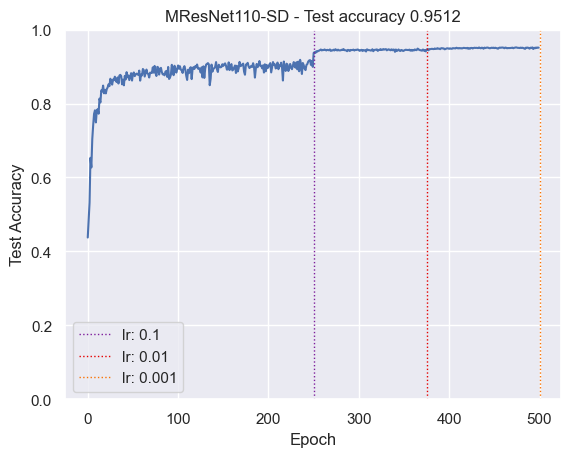

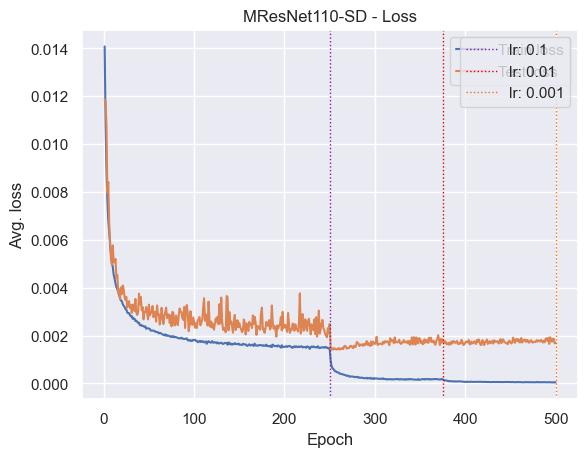

In [7]:
with open(p) as f:
    lines = f.read()

data = re.findall(
    r"Epoch (\d+) finished, average loss: (\d+\.\d+)\n[\d\- :\.]*\nStarting testing\n[\d\- :\.]*\nCorrect: \d+, total: \d+, accuracy: (\d+\.\d+), average loss: (\d+\.\d+)",
    lines,
    re.MULTILINE,
)
# print(len(data))
# print(data)
epochs = [int(x[0]) for x in data]
losses = [float(x[1]) for x in data]
accuracies = [float(x[2]) for x in data]
test_losses = [float(x[3]) for x in data]

results_mresnet164 = dict(epochs=epochs, losses=losses, accuracies=accuracies, test_losses=test_losses)

fix, ax = plt.subplots()
ax.plot(accuracies)
ax.set_ylim(0, 1)
plt.title(f"{model_name} - Test accuracy {accuracies[-1]:.4f}")
plt.ylabel("Test Accuracy")
plt.xlabel("Epoch")
# ax.yaxis.set_major_locator(MultipleLocator(0.05))
cmap = plt.get_cmap("Pastel1")

for color, (epoch, value) in zip(["xkcd:purple", "xkcd:red", "xkcd:orange"], lr_dict.items()):
    plt.axvline(x=epoch, label=f"lr: {value}", linestyle=":", linewidth=1, c=color)
    
plt.legend()
plt.show()

fix, ax = plt.subplots()
train_loss, = ax.plot(epochs, losses, label="Train loss")
test_loss, = ax.plot(epochs, test_losses, label="Test loss")
plt.title(f"{model_name} - Loss")
plt.ylabel("Avg. loss")
plt.xlabel("Epoch")
first_legend = plt.legend(handles=[train_loss, test_loss])

ax = plt.gca().add_artist(first_legend)

lrhs = []
for color, (epoch, value) in zip(["xkcd:purple", "xkcd:red", "xkcd:orange"], lr_dict.items()):
    lr_h = plt.axvline(x=epoch, label=f"lr: {value}", linestyle=":", linewidth=1, c=color)
    lrhs.append(lr_h)

plt.legend(handles=lrhs)
plt.show()

In [8]:
with open(f"{model_name}_ks.txt", "w") as f:
    for i, x in enumerate(net.ks, start=1):
        f.write(f"{i},{x.item()}\n") 